# Parametric Weighted Ehrhart Polynomials, Alcoved Polytopes, and $h^{*}$-positivity
### Supplementary code from our publication: https://arxiv.org/abs/2511.09744
### Published November 12th, 2025.
### Authors: Daniel Hwang, Juliet Whidden, Josephine Yu (Georgia Tech)

## Foreword

### Brief Background

Let $P = P_{A}(\mathbf{b}) \subseteq \mathbb{R}^{d}$ be a integral convex polytope defined as the solution set to the system of linear inequalities $Ax \leq \mathbf{b}$, where $A \in \mathbb{Z}^{n \times d}$ and $\mathbf{b} \in \mathbb{Z}^{n}$. We say $P$ is *smooth* if each vertex cone of $P$ is generated by a basis of $\mathbb{Z}^d$. Note if $A$ is a unimodular matrix, i.e, all of its $d \times d$ minors are in the set $\{-1, 0, 1\}$, then $P$ is smooth iff $P$ is simple (i.e. all of its vertices are incident to exactly $d$ facets).

Now let $w$ be a real-valued polynomial of degree $m$ on $\mathbb{R}^{d}$, which we refer to as our *weight function*. We define the *weighted Ehrhart polynomial* with respect to polytope $P$ and weight function $w$ to be $\text{ehr}_{P, w}(t) = \sum_{\mathbf{p} \in tP \cap \mathbb{Z}^{d}}{w(\mathbf{p})}$ and the *weighted Ehrhart series* with respect to $P, w$ to be $\text{Ehr}_{P, w}(z) = \sum_{t \geq 0}{\text{ehr}_{P, w}(t)z^{t}} = \frac{h_{P, w}^{*}(z)}{(1 - z)^{d + m + 1}}$. We refer to the numerator as the **weighted $h^{*}$-polynomial**, which is of degree $d + m$ and will be our main object of interest for this paper. Mainly, Stanley famously proved the coefficients of $h_{P, 1}^{*}$ must be nonnegative integers, however, this no longer holds as soon as $w$ is allowed to be any weight.

### Brief Introduction

The last observation helps motivates the following questions:
1. As we deform the polytope $P$ by changing the ``right-hand side'' of the linear inequalities in $Ax \leq \mathbf{b}$, how do the weighted Ehrhart and $h^{*}$-polynomials change?
2. **How can we efficiently compute the weighted Ehrhart and $h^{*}$ polynomials?**
3. Which combinations of integer polytopes $P$ and homogeneous weight polynomials $w$ give weighted $h^{*}$ polynomials with nonnegative coefficients?

We address Question 1 in Section 2 of our paper, where we observe that if a polytope $P_{A}(\mathbf{b})$ is defined as the solution set to $Ax \leq \mathbf{b}$, where $A$ is a fixed integer matrix in $\mathbb{Z}^{n \times d}$ and $\mathbf{b} = (b_{1} \ldots b_{n})^{T}$ is an integer vector, then the weighted $h^{*}$-polynomial is a piecewise polynomial in terms of the $b_{i}$, and the regions of polynomiality are *secondary cones* or *type cones* corresponding to the different normal fans of polytopes. In other words, we say that $\mathbf{b'}$ belongs to the same type cone as $\mathbf{b}$ if $P_{A}(\mathbf{b}')$ is obtained from $P_{A}(\mathbf{b})$ a *motion of the walls* if the normal fan of $P_{A}(\mathbf{b}')$ coarsens that of $P_{A}(\mathbf{b})$'s.

In this supplementary code, we address Question 2 by providing a concrete implementation of our algorithm that computes the weighted Ehrhart and $h^{*}$-polynomial for an arbitrary **smooth** polytope. Note that our algorithm runs in polynomial time in terms of the number of vertices of our polytope $P$ for fixed dimension and weight degree. 

We also address Question 3 by providing some observations on the space of weighted $h^{*}$-polynomials.

### Brief Summary of Algorithm

We rely on Theorem 3.3, the weighted Khovanskii-Pukhilkov theorem, which states the weighted integer point count of a polytope $P = P_{A}(\mathbf{b})$ can be defined as
$$\sum_{\mathbf{p} \in P \cap \mathbb{Z}^{d}} w(\mathbf{p}) = \left(\text{Todd}_{\mathbf{h}} \int_{P_{A}(\mathbf{b} + \mathbf{h})} w(x) dx \right)\Big|_{\mathbf{h} = 0}$$

where $\text{Todd}_{h} = \sum_{k \geq 0}(-1)^{k} \frac{B_{k}}{k!} \left( \frac{d}{dh} \right)^{k}$ is the univariate Todd operator and $\text{Todd}_{\mathbf{h}} = \prod_{i = 1}^{m} \text{Todd}_{h_{i}}$ is the multivariate Todd operator. Note that above, $P_{A}(\mathbf{b} + \mathbf{h})$ is a slightly shifted version of our original polytope defined as the solution set to $Ax \leq \mathbf{b} + \mathbf{h}$ for sufficiently small $\mathbf{h}$. 

Our algorithm is stated as follows:

Input: A homogeneous polynomial $w$ in $d$ variables, along with a matrix $A \in \mathbb{Z}^{n \times d}$ and a vector $\mathbf{b}^{0} \in \mathbb{Z}^{n}$ such that $P_{A}(\mathbf{b}^{0})$ is a smooth polytope.

Output: The weighted integer point count $\sum_{\mathbf{p} \in P(b_{i} \cap \mathbb{Z}^{d}} w(\mathbf{p})$ as a polynomial in terms of $b_{i}$ for all integral polytopes $P_{A}(\mathbf{b})$ obtained from $P_{A}(\mathbf{b}^{0})$ by a motion of the walls.
1. Find a triangulation of $P_{A}(\mathbf{b}^{0})$, which gives a triangulation of $P_{A}(\mathbf{b} + \mathbf{h})$.
2. For each maximal simplex $\Delta$ in the triangulation of $P_{A}(\mathbf{b} + \mathbf{h})$, compute the integral $\int_{\Delta} w(x) dx$ over each $\Delta$ with Theorem 3.3 (Corollary 20 of "How To Integrate A Polynomial Over A Simplex" by Baldoni et al.). Sum up integrals over all maximal simplices to obtain $\int_{P_{A}(\mathbf{b} + \mathbf{h})} w(x) dx$.
3. Apply the Todd operator to this integral and evaluate at $\mathbf{h} = 0$, which gives us the weighted integer point count by Theorem 3.2.

To convert the weighted integer point count polynomial into the weighted Ehrhart polynomial, we evaluate the weighted integer point count polynomial at $b_{i} = tb_{i}$ and perform a linear transformation of coefficients via the Eulerian polynomials to obtain the weighted $h^{*}$-polynomial.

For more on our results, please read our paper.

### Brief Introduction To Alcoved Polytopes

In particular, we will apply our algorithm on alcoved polytopes, which are polytopes formed by the intersection $x_{i} - x_{j} \leq b_{ij}$, with all $b_{ij}$ satisfying the triangle inequalities $b_{ik} \leq b_{ij} + b_{jk}$. The sets of all tuples $(b_{ij})$ satisfying these inequalities forms a cone (called the *type cone* or *secondary cone*) in $\mathbb{R}^{d(d+1)}$ and has a fan structure corresponding to the combinatorial types of alcoved polytopes, called the *type fan of alcoved polytopes*, denoted $\mathcal{F}_{d}$. Polytopes that lie in the interior of a maximal cone of $\mathcal{F}_{d}$ are called maximal. It is known that (maximal)? alcoved polytopes are smooth since they are simple and their corresponding matrices are unimodular.

Note that if some inequality is an equality, i.e., $b_{ik} = b_{ij} + b_{jk}$, then we consider this to be a *degenerate alcoved polytope*. 

In our code, we provide a method that recovers a maximal alcoved polytope from a possibly degenerate alcoved polytope.

### This Notebook

This notebook (run with the SageMath 10.3 kernel) will compute the weighted integer point count (and corresponding weighted Ehrhart-$h^{*}$ polynomial) for an arbitrary integral smooth/alcoved polytope $P \subseteq \mathbb{R}^{d}$. We will use this code to investigate the nature of their corresponding weighted $h^{*}$-polynomials. Along the way, we provide detailed documentation and examples.

## Helper Functions
Explanation given for each of the code blocks.
- Function that creates an alcoved polytope $P_{A}(\mathbf{b})$ from a $d \times d$ matrix whose values correspond to the different $b_{ij}$ in $x_{i} - x_{j} \leq b_{ij}$.
- Functions that calculate the determinant of a matrix, check if a polytope is simple, and check if a polytope is smooth (by checking if it is smooth and its corresponding matrix is unimodular).
- Functions that create a random alcoved polytope, check if a polytope is simple, and recover the matrix $B$ corresponding to an alcoved polytope $P_{A}(\mathbf{b})$.
- Function that recovers a generic alcoved polytope (with maximal number of vertices, triangle inequalities are strict) from a possibly degenerate alcoved polytope (triangle inequalities not necessarily strict) (with corresponding helper functions).
- Function that takes a fixed integral smooth polytope $P_{A}(\mathbf{b})$ with facets $A_{i} * x \leq b_{i}$ and transforms it into a general version of the form $P_{A}(\mathbf{b} + \mathbf{h})$, written as $A_{i} * x \leq b_{i} + h_{i}$, which is represented as a corresponding list of vertices. This is NOT stored as a Polyhedron in SageMath, as SageMath cannot handle polyhedra with variable coordinates. 
- Functions that do the (univariate and multivariate) Todd operation.
- Functions used in iterating over a multiset and generating said multisets.

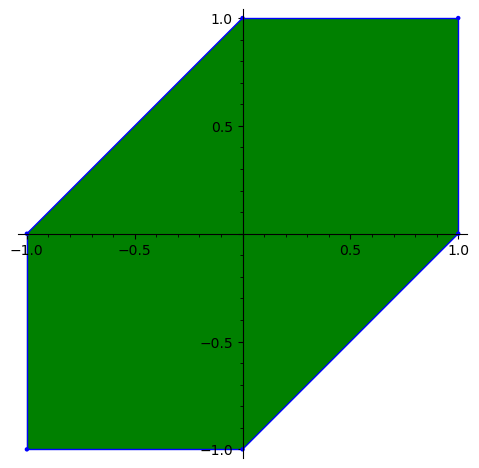

In [1]:
## HELPER FUNCTIONS - Creating alcoved polytopes aka polytropes, our main "playing field" for this project.

## Creates a polytrope from a matrix B corresponding to entries b_ij.
# INPUT: A single square matrix B with entries corresponding to b_ij defining an alcoved polytope.
# OUTPUT: A Polyhedron corresponding to the full-dimensional polytrope defined by the inequalities x_i - x_j <= b_ij
def polytrope(B):
    # Check if matrix is square
    for i in range(len(B)):
        if len(B) != len(B[i]):
            raise ValueError("Input matrix must be square!")

    # Now fill in inequalities and put them into polytope_inequalities.
    polytrope_inequalities = []
    for i in range(1, len(B) + 1):
        for j in range(1, len(B) + 1):
            if i != j:
                # Inequality is of the form x_i - x_j <= b_{ij}. SageMath's notation is to interpret inequality tuple (b, A) as Ax + b >= 0.
                # Our inequality can be rewritten as x_j - x_i + b_{ij} >= 0. This means set index j to 1, index i to -1, b_{ij} to index 0. 
                # NOTE: Here, i, j are 1-indexed, but the matrix entries are 0-indexed, so we adjust accordingly.

                #Initialize inequality tuple
                i_j_inequality = [0]*(len(B))
                
                # Set b_ij to index 0.
                i_j_inequality[0] = B[i-1][j-1]

                # Set index j to 1, index i to -1, unless if i or j is equal to len(B).
                if i != len(B):
                    i_j_inequality[i] = -1
                if j != len(B):
                    i_j_inequality[j] = 1

                #Now that we have our tuple, add it to polytrope inequalities.
                i_j_inequality_tuple = tuple(i_j_inequality)
                polytrope_inequalities.append(i_j_inequality)
                
    return(Polyhedron(ieqs=polytrope_inequalities))

# Sample run of the above code.
test_polytrope = polytrope([[0, 1, 1], [1, 0, 1], [1, 1, 0]]) #note diagonal entries are ignored and set to 0. should return a polytrope with vertices (-1, -1), (-1, 0), (0, 1), (1, 1), (1, 0), (0, -1)
test_polytrope.show()

In [2]:
## HELPER FUNCTIONS - used to check if a polytope is simple and smooth.

## Calculates determinant of a matrix using cofactor expansion.
# INPUT: A Matrix M in SageMath.
# OUTPUT: Determinant of said matrix.
def determinant_of_matrix(M):
    
    # In the weird case that a submatrix is returned as an rational or an integer, return back M (here, M is a 1 by 1 matrix)
    # Then check if number of rows == number of cols and >= 2.
    if type(M) == sage.rings.rational.Rational or type(M) == sage.rings.integer.Integer:
        return M
    elif M.nrows() == 0:
        return 0
    elif M.nrows() == 1:
        return M[0][0]
    elif M.nrows() != M.ncols():
        return 0

    # Compile determinant of sum of cofactors.
    sum = 0
    
    # i = 0 case
    sum += (-1)^0 * M[0][0] * determinant_of_matrix(determinant_of_matrix(M.submatrix(1, 1)))

    # middle case
    for i in range(1, M.ncols() - 1):
        sum += (-1)^i * M[0][i] * determinant_of_matrix(M.submatrix(1, 0, ncols = i).augment(M.submatrix(1, i+1, ncols = M.ncols() - i - 1)))

    # i = M.ncols() - 1 case
    sum += (-1)^(M.ncols() - 1) * M[0][M.ncols() - 1] * determinant_of_matrix(M.submatrix(1, 0))
    
    return sum

## Check if polytope is a simple polytope by iterating through the vertices and checking that exactly d hyperplanes intersect at each point. 
# INPUT: A Polyhedron P in SageMath.
# OUTPUT: A boolean indicating if smooth or not.
def check_if_simple(P):
    for vertex in P.Vrepresentation():
        # count the number of hyperplanes touching each vertex, should be equal to dimension of P.
        num_hyperplanes = 0
        for hyp in vertex.incident():
            num_hyperplanes += 1
        if num_hyperplanes != dim(P):
            return False
    return True

## Check if polytope P_A(B) is a smooth polytope. 
# In this case, we check that the corresponding matrix A is unimodular (i.e. that each of the minors of A are in the set {-1, 0, 1}) and P is simple.
# NOTE: The above is a necessary but not sufficient condition; it is possible for a smooth polytope to arise from a non-unimodular matrix.
# INPUT: A Polyhedron P = P_A(B) in SageMath.
# OUTPUT: A boolean indicating if smooth or not.
def check_if_smooth(P):
    # Extract the matrix in P by iterating through hyperplanes and constructing a matrix.
    list_of_rows = []
    for hyp in P.Hrepresentation():
        # Each hyperplane is of the form Ax + b >= 0 (or equivalently -Ax <= b), we extract -A.
        list_of_rows.append(-hyp.A())
    # Create matrix from list_of_rows
    P_matrix = matrix(list_of_rows)
    
    # Now check if this matrix is unimodular, i.e, every d by d square minor is of determinant -1, 0, 1. 
    # We do this naively, as there is no neat implementation.
    size_of_minor = min(P_matrix.nrows(), P_matrix.ncols()) # Should be equal to the number of columns.
    for start_row_index in range(0, P_matrix.nrows() - size_of_minor + 1):
        for start_col_index in range(0, P_matrix.ncols() - size_of_minor + 1):
            determinant_of_submatrix = determinant_of_matrix(P_matrix.submatrix(start_row_index, start_col_index, size_of_minor, size_of_minor))
            if determinant_of_submatrix == 0:
                pass
            elif determinant_of_submatrix == 1:
                pass
            elif determinant_of_submatrix == -1:
                pass
            else:
                return False

    # Now check if this polytope is simple!
    if not check_if_simple(P):
        return False
    return True

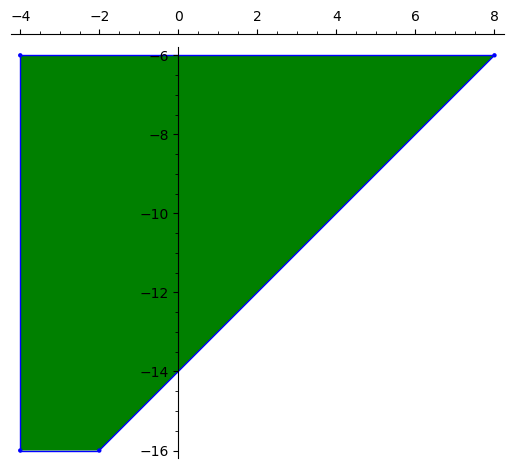

Printing out corresponding B (note diagonal entries are set to 0 by default and ignored):
[[0, 14, 8], [-2, 0, -6], [4, 16, 0]]


In [3]:
## HELPER FUNCTIONS - Recovering B from P_A(B) and Creating random alcoved polytopes.

## Generates a matrix B that corresponds to input, with b_i_j satisfying triangle inequalities.
# INPUT: A Polyhedron corresponding to an alcoved polytrope.
def polytrope_to_B(P):
    # Retrieve a list of vertices to iterate over.
    V=P.vertices()
    # Obtain dimension of polytope.
    d = dim(P)
    # Create matrix B to store the list of b_i_j. Iterate over the list of vertices and evaluate x_i - x_j on each vertex, take the maximum value.
    B=[[0 for i in range(d+1)] for j in range(d+1)]
    for i in range(d):
        B[i][d]=max(v[i] for v in V)
        B[d][i]=max(-v[i] for v in V)
        for j in range(d):
            B[i][j]=max(v[i]-v[j] for v in V)
    return(B)

## Generates a random polytrope with b_ij's in (-1000,1000) of a desired dimension.
# WARNING: This does not check for triangle inequalities, merely that the resulting shape is 
# full dimensional, so you may get degenerate alcoved polytopes.
# INPUT: desired_dim is the desired dimension of the polytrope.
def random_polytrope(desired_dim = 2):
    # Create polytrope. If it is not desired dimension, do it again.
    # DEV NOTE: This usually will not work in dimension >= 4, as random combinations of b_ij will not satisfy triangle inequalities.
    P = polytrope([[randint(-20,20) for j in range(desired_dim+1)] for i in range(desired_dim+1)])
    if dim(P)<desired_dim or not check_if_smooth(P): return(random_polytrope(desired_dim))
    return(P)

# Sample runs of the above code (note determinant is only a helper function in check_if_smooth)
rand_poly = random_polytrope(2)
rand_poly.show() #should return a random (possibly degenerate) polytrope.
print("Printing out corresponding B (note diagonal entries are set to 0 by default and ignored):")
print(polytrope_to_B(rand_poly))

In [4]:
## Given a degenerate alcoved polytope, we perturb its facets to obtain a maximal alcoved polytope with C(2d, d) vertices.

## List all facets of P, i.e, all ordered pairs of the form [i, j] such that the facet $x_{i} - x_{j} \leq b_{ij}$ is present.
# INPUT: A Polyhedron corresponding to an alcoved polytrope.
# Note all facets are 1-indexed.
def all_ij_facets(P):
    F=[]
    for f in P.facets():
        ieq = f.ambient_Hrepresentation()
        ij=facet_ieq_to_bij(ieq)
        F.append(ij)
    return(F)

## Convert each facet of x_i - x_j <= bij into left hand side x_i - x_j, returning [i, j].
# INPUT: A Polyhedron corresponding to an alcoved polytrope.
# Note: i, j here are 1-indexed.
def facet_ieq_to_bij(ieq):
    vec = list(ieq[0][1:])
    d=len(vec)
    mins = min(abs(x) for x in vec if x != 0)
    vec = [x/mins for x in vec]
    i= -1 
    j = -1
    if 1 in vec: 
        j=vec.index(1)+1
    if -1 in vec: i=vec.index(-1)+1
    if i==-1: i=d+1
    if j==-1: j=d+1
    return([i,j])

## Recover a maximal alcoved polytope with the maximal number of vertices by perturbing the facets by a small amount.
# INPUT: P, a Polyhedron in SageMath corresponding to a integral degenerate alcoved polytope. 
# OUTPUT: P', a Polyhedron in SageMath corresponding to a integral maximal alcoved polytope.
def recover_maximal_alcoved(P):
    # Obtain dimension of d.
    d=dim(P)
    
    # Terminate when maximal number of vertices is listed.
    if P.n_vertices()==binomial(2*d,d): 
        return(P)

    # Obtain matrix associated with polytrope. Double its size. Ignore None entries.
    B=polytrope_to_B(P)
    for i in range(len(B)):
        for j in range(len(B[0])):
            if B[i][j] != None:
                B[i][j] = 2 * B[i][j]

    # Obtain list of facets.
    facets=all_ij_facets(P)
    
    # We keep track of whether we move a facet. We stop the following for loops once one facet has been moved
    # that increases the number of vertices in P_to_B by setting moved = True.
    # NOTE: i, j are 1-indexed, so we shift them back in our matrix below.
    moved=False
    for i in range(1,d+2):
        for j in range(1,d+2):
            # Moves in facet by 1 if possible
            if i!=j and ([i,j] not in facets) and moved==False:
                B[i-1][j-1]-= 1
                moved=True
    if moved==False:
        for v in P.vertices():
            if sum(1 for f in P.facets() if v in f) != d:
                for f in P.facets():
                    # if no facet was moved above, we move out some facet by 1
                    if v in f and moved==False:
                        ieq = f.ambient_Hrepresentation()
                        ij=facet_ieq_to_bij(ieq)
                        B[i-1][j-1]+= 1 #moves out a facet associated with some vertex.
                        # If this move does not increase the number of vertices, move onto the next facet and revert the above move.
                        if polytrope(B).n_vertices() > P.n_vertices():
                            moved=True
                        else:
                            B[i-1][j-1] -= 1
    
    return(recover_maximal_alcoved(polytrope(B)))

## Sample runs of above code.
print("This code creates a random possibly degenerate alcoved polytope P and generalizes it to a maximal alcoved polytope Q.")
P=random_polytrope(3)
Q=recover_maximal_alcoved(P)  
print("The number of facets of Q is", Q.n_facets())
print("The number of vertices of Q is", Q.n_vertices())
Q.plot() 

This code creates a random possibly degenerate alcoved polytope P and generalizes it to a maximal alcoved polytope Q.
The number of facets of Q is 12
The number of vertices of Q is 20


Graphics3d Object

Case 1


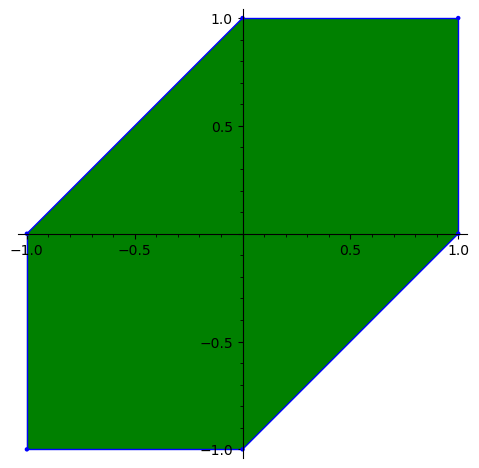

This function prints out how each hyperplane is shifted from Ax + b' >= 0 to Ax + (b + h) >= 0. To disable, set suppress_output = True. If fixed = True, then b is fixed at b' instead of being a general variable of the form b_i_j.
An inequality (-1, 0) x + 1 >= 0 transformed into generic hyperplane (-1, 0)x + b_1 + h_1 >= 0
An inequality (-1, 1) x + 1 >= 0 transformed into generic hyperplane (-1, 1)x + b_2 + h_2 >= 0
An inequality (0, -1) x + 1 >= 0 transformed into generic hyperplane (0, -1)x + b_3 + h_3 >= 0
An inequality (1, 0) x + 1 >= 0 transformed into generic hyperplane (1, 0)x + b_4 + h_4 >= 0
An inequality (0, 1) x + 1 >= 0 transformed into generic hyperplane (0, 1)x + b_5 + h_5 >= 0
An inequality (1, -1) x + 1 >= 0 transformed into generic hyperplane (1, -1)x + b_6 + h_6 >= 0
[[b_2 - b_5 + h_2 - h_5, -b_5 - h_5], [b_1 + h_1, b_3 + h_3], [b_1 + h_1, b_1 - b_2 + h_1 - h_2], [b_3 - b_6 + h_3 - h_6, b_3 + h_3], [-b_4 - h_4, -b_4 + b_6 - h_4 + h_6], [-b_4 - h_4, -b_5 - h_5]]

Case 

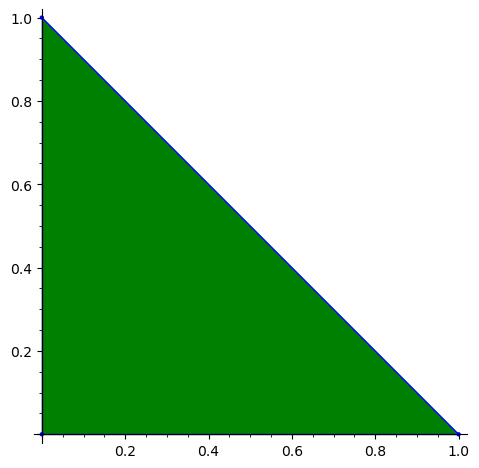

This function prints out how each hyperplane is shifted from Ax + b' >= 0 to Ax + (b + h) >= 0. To disable, set suppress_output = True. If fixed = True, then b is fixed at b' instead of being a general variable of the form b_i_j.
An inequality (-1, -1) x + 1 >= 0 transformed into generic hyperplane (-1, -1)x + b_1 + h_1 >= 0
An inequality (1, 0) x + 0 >= 0 transformed into generic hyperplane (1, 0)x + b_2 + h_2 >= 0
An inequality (0, 1) x + 0 >= 0 transformed into generic hyperplane (0, 1)x + b_3 + h_3 >= 0
[[b_1 + b_3 + h_1 + h_3, -b_3 - h_3], [-b_2 - h_2, b_1 + b_2 + h_1 + h_2], [-b_2 - h_2, -b_3 - h_3]]

Case 3 - same as Case 2, but fixed


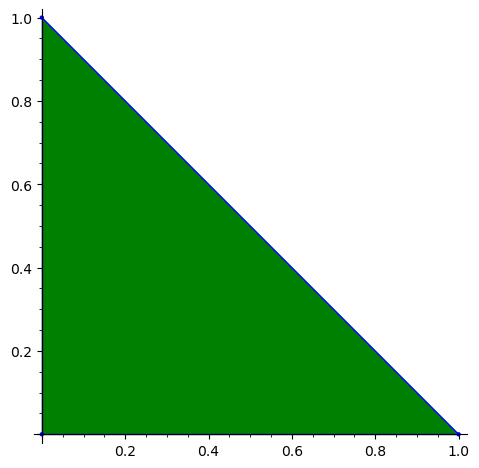

This function prints out how each hyperplane is shifted from Ax + b' >= 0 to Ax + (b + h) >= 0. To disable, set suppress_output = True. If fixed = True, then b is fixed at b' instead of being a general variable of the form b_i_j.
An inequality (-1, -1) x + 1 >= 0 transformed into generic hyperplane (-1, -1)x + 1 + h_1 >= 0
An inequality (1, 0) x + 0 >= 0 transformed into generic hyperplane (1, 0)x + 0 + h_2 >= 0
An inequality (0, 1) x + 0 >= 0 transformed into generic hyperplane (0, 1)x + 0 + h_3 >= 0
[[h_1 + h_3 + 1, -h_3], [-h_2, h_1 + h_2 + 1], [-h_2, -h_3]]
Case 4 - random 3D polytope


Graphics3d Object

This function prints out how each hyperplane is shifted from Ax + b' >= 0 to Ax + (b + h) >= 0. To disable, set suppress_output = True. If fixed = True, then b is fixed at b' instead of being a general variable of the form b_i_j.
An inequality (1, 0, 0) x + 11 >= 0 transformed into generic hyperplane (1, 0, 0)x + b_1 + h_1 >= 0
An inequality (-1, 0, 1) x - 16 >= 0 transformed into generic hyperplane (-1, 0, 1)x + b_2 + h_2 >= 0
An inequality (1, 0, -1) x + 18 >= 0 transformed into generic hyperplane (1, 0, -1)x + b_3 + h_3 >= 0
An inequality (1, -1, 0) x + 14 >= 0 transformed into generic hyperplane (1, -1, 0)x + b_4 + h_4 >= 0
An inequality (0, 1, 0) x + 0 >= 0 transformed into generic hyperplane (0, 1, 0)x + b_5 + h_5 >= 0
An inequality (0, 0, -1) x + 16 >= 0 transformed into generic hyperplane (0, 0, -1)x + b_6 + h_6 >= 0
[[b_2 + b_6 + h_2 + h_6, -b_5 - h_5, b_6 + h_6], [b_2 + b_6 + h_2 + h_6, b_2 + b_4 + b_6 + h_2 + h_4 + h_6, b_6 + h_6], [-b_3 + b_6 - h_3 + h_6, -b_3 + b_4 + b_6 -

In [5]:
## HELPER FUNCTIONS - this function takes in a fixed integral smooth polytrope P and returns a list of vertices
# corresponding to the generic version of said polytope. By generic, we mean that the hyperplanes are allowed to vary, as
# long as the resulting polytope belongs to the same combinatorial type (part of the same secondary cone/type cone) as the original.

# For example, a right triangle in R^2 with hyperplanes 1x + 0y >= 0, 0x + 1y >= 0, -1x - 1y >= -1 gets transformed into 
# a generalized right triangle with hyperplanes 1x + 0y >= b_1 + h_1, 0x + 1y >= b_2 + h_2, -1x -1y >= b_3 + h_3. 
# This function then returns a list of vertices corresponding to the shifted polytope defined above (which is used especially in volume_simplex).
# Again, we assume the b_k values correspond to the same combinatorial type as the original right triangle.

# INPUT: P, a Polyhedron in SageMath corresponding to a integral smooth polytope. Defined as the solution set to Ax + b' >= 0 (for fixed A and b')
# INPUT: suppress_output - If True, ignore any print statements from generic_integral_smooth_polytope. Set to False by default.
# INPUT: fixed - If True, then do not generalize right triangle (add in b_i_j) and just keep original polytope and set of vertices perturbed by h. Set to False by default.
# OUTPUT: A list of vertices corresponding to the solution set Ax + (b + h) >= 0, where h is a small perturbation and b is a generic set of variables.
# OUTPUT: b_k_variables, h_variables - variables created by this function, used later in the program.

def generic_integral_smooth_polytope(P, suppress_output = False, fixed = False):
    # Define necessary variables in terms of the coordinates of P (x_1, ..., x_d)
    x_variables = []
    for i in range(1,dim(P)+1):
        x_variables.append(var('x_'+str(i)))
    
    # Prints out information (if suppress_output == True) about each hyperplane of the original polytope P 
    # of the form A_{k}x + b_{k}' >= 0 and how it is shifted over to A_{k}x + (b_k + h_k) >= 0.
    # We also create a dictionary between each hyperplane to its shifted form.
    if not suppress_output:
        print("This function prints out how each hyperplane is shifted from Ax + b' >= 0 to Ax + (b + h) >= 0. To disable, set suppress_output = True. If fixed = True, then b is fixed at b' instead of being a general variable of the form b_i_j.")
    current_index = 1
    b_k_variables = []
    h_variables = []
    from_generic_hyperplane_to_shifted_equation_dict = {}
    for hyperplane in P.Hrepresentation():
        # For each hyperplane, create new variables corresponding to each facet, mainly b_{current_index} and h_{current_index}
        # If fixed = True, we do not create b_k_variables.
        if not suppress_output and not fixed:
            print(str(hyperplane) + " transformed into generic hyperplane " + str(hyperplane.A()) + 
              "x + b_" + str(current_index) + " + h_" + str(current_index) + " >= 0")
        if not suppress_output and fixed:
            print(str(hyperplane) + " transformed into generic hyperplane " + str(hyperplane.A()) + 
              "x + " + str(hyperplane.b()) + " + h_" + str(current_index) + " >= 0")
        if not fixed:
            b_k_variables.append(var('b_' + str(current_index)))
        h_variables.append(var('h_' + str(current_index)))

        # Now create an expression of the form b_{current_index} + h_{current_index} = x_{i} - x_{j} (for the corresponding facet)
        # If fixed = True, we replace b_{current_index} with the original rhs of the hyperplane.
        if not fixed:
            new_expr = var('b_' + str(current_index)) + var('h_' + str(current_index))
        else:
            new_expr = hyperplane.b() + var('h_' + str(current_index))
        for i in range(0, dim(P)):
            new_expr = new_expr + hyperplane.A()[i] * var('x_' + str(i+1))
        from_generic_hyperplane_to_shifted_equation_dict[hyperplane] = new_expr
        current_index += 1

    # Compiles a new list of vertices based off our shifted hyperplanes.
    # For each vertex in the original polytope, map each of the hyperplanes to their shifted counterpart and then compute their intersection.
    # We do this because SageMath does not support generalized Polyhedra with variable coordinates.
    # We will use this vertex representation in the main functions to compute the integral of w(x) over P(b_ij).
    new_list_of_vertices = []
    for vertex in P.Vrepresentation():
        # compile a list of hyperplanes touching each vertex, convert them to their shifted expressions (left hand side of new shifted inequalities)
        # and then solve for all of these equations set to 0.
        list_of_equations = []
        for hyperplane in vertex.incident():
            list_of_equations.append(from_generic_hyperplane_to_shifted_equation_dict[hyperplane])
        new_vertex = solve(list_of_equations, x_variables)[0] 
        new_vertex = list(map(lambda item : item.rhs(), new_vertex))
        new_list_of_vertices.append(new_vertex)

    return new_list_of_vertices, b_k_variables, h_variables

## Sample runs of above code.
print("Case 1")
test_polytrope = polytrope([[None, 1, 1], [1, None, 1], [1, 1, None]]) #should return a polytrope with vertices (-1, -1), (-1, 0), (0, 1), (1, 1), (1, 0), (0, -1)
test_polytrope.show()
new_list_of_vertices, b_k_variables, h_variables = generic_integral_smooth_polytope(test_polytrope, suppress_output = False, fixed = False) 
#this function symbolically generates a list of vertices corresponding to the shifted polytope described above.
print(new_list_of_vertices)
print()

print("Case 2")
right_triangle = Polyhedron(ieqs = [(0, 1, 0), (0, 0, 1), (1, -1, -1)]) #should return a polytope with vertices (0, 0), (0, 1), (1, 0).
right_triangle.show()
new_list_of_vertices, b_k_variables, h_variables = generic_integral_smooth_polytope(right_triangle, suppress_output = False, fixed = False) 
#this function symbolically generates a list of vertices corresponding to the shifted right triangle described above.
print(new_list_of_vertices)
print()

print("Case 3 - same as Case 2, but fixed")
right_triangle = Polyhedron(ieqs = [(0, 1, 0), (0, 0, 1), (1, -1, -1)]) #should return a polytope with vertices (0, 0), (0, 1), (1, 0).
right_triangle.show()
new_list_of_vertices, b_k_variables, h_variables = generic_integral_smooth_polytope(right_triangle, suppress_output = False, fixed = True) 
#this function symbolically generates a list of vertices corresponding to the shifted right triangle described above.
print(new_list_of_vertices)

print("Case 4 - random 3D polytope")
test_polytrope = random_polytrope(3) 
test_polytrope.show()
new_list_of_vertices, b_k_variables, h_variables = generic_integral_smooth_polytope(test_polytrope, suppress_output = False, fixed = False) 
#this function symbolically generates a list of vertices corresponding to the shifted polytope described above.
print(new_list_of_vertices)

In [6]:
## HELPER FUNCTIONS - setting up Todd computations used in `integral_smooth_polytope_shifted_by_h`

## takes the kth derivative of a function f with respect to variable x
def k_deriv(f,x,k):
    for i in range(k):
        f=derivative(f,x)
    return(f)

## Univariate Todd operator for a polynomial f with respect to variable x
def Todd(f,x):
    return(sum(((-1)^k*bernoulli(k)/factorial(k)*k_deriv(f,x,k)) for k in range(f.degree(x)+1)))

## Multivariate Todd operator for a polynomial f (<class 'sage.symbolic.expression.Expression'> in SageMath) with respect to multiple variables
def Todd_multivariate(f, variables_to_derive):
    g = f
    for variable in variables_to_derive:
        g = Todd(g, variable)
    return g

# Sample run of the above code (note k_deriv is a helper function in Todd, note Todd_multivariate just repeatedly calls Todd on different variables)
# (This is mainly used in Todd_multivariate)
var('h')
test_expression = h^2
print(Todd(test_expression, h))

h^2 + h + 1/6


In [7]:
## HELPER FUNCTIONS - setting up iterative methods needed in our implementation of Theorem 3.3, `integral_simplex`

## list of all strings of length n with characters 0 & 2 (will subtract 1 to get -1 & 1)
def bin(n): return(Words(alphabet='02', length=n))

## recursively define for loops to nest arbitrarily many
def nestedfor(M,start,end):
    for i1 in range(start,end):
        if M==1: yield[i1]
        else:
            for others in nestedfor(M-1,i1,end):
                yield [i1]+others

## returns list of all multisets of {0,...,d} of length M
def multiset(M,d):
    if M==0: return([])
    return(list(nestedfor(M,0,d)))

# Sample runs of the above code (note nestedfor is only a helper function in multiset) (both of these are primarily used in integral_simplex)
print(bin(3))
print(multiset(3, 6))

Words of length 3 over {'0', '2'}
[[0, 0, 0], [0, 0, 1], [0, 0, 2], [0, 0, 3], [0, 0, 4], [0, 0, 5], [0, 1, 1], [0, 1, 2], [0, 1, 3], [0, 1, 4], [0, 1, 5], [0, 2, 2], [0, 2, 3], [0, 2, 4], [0, 2, 5], [0, 3, 3], [0, 3, 4], [0, 3, 5], [0, 4, 4], [0, 4, 5], [0, 5, 5], [1, 1, 1], [1, 1, 2], [1, 1, 3], [1, 1, 4], [1, 1, 5], [1, 2, 2], [1, 2, 3], [1, 2, 4], [1, 2, 5], [1, 3, 3], [1, 3, 4], [1, 3, 5], [1, 4, 4], [1, 4, 5], [1, 5, 5], [2, 2, 2], [2, 2, 3], [2, 2, 4], [2, 2, 5], [2, 3, 3], [2, 3, 4], [2, 3, 5], [2, 4, 4], [2, 4, 5], [2, 5, 5], [3, 3, 3], [3, 3, 4], [3, 3, 5], [3, 4, 4], [3, 4, 5], [3, 5, 5], [4, 4, 4], [4, 4, 5], [4, 5, 5], [5, 5, 5]]


## Main Functions
Explanations given for each of the code blocks.
- Defines R_vars, a ring in which we define our weights, along with a function to change R_vars. **IMPORTANT NOTE: If you change the dimension of your polytope, you must run `update_global_variables(desired_dim)` before making any calls to our weighted functions.**
- Given a list of vertices of a simplex $S$, functions here compute the volume of $S$ and the integral of $w(x)$ over $S$ (which implements Theorem 3.3 in our paper). Uses Thm 3.3 (Corollary 20 of "How To Integrate A Polynomial Over A Simplex" by Baldoni et al.).
- Given a smooth polytope $P$, create $P(\mathbf{b} + \mathbf{h})$ and compute the integral $\int_{P(\mathbf{b} + \mathbf{h})} w(x) dx$ (this is done by triangulating $P(\mathbf{b}^{0})$, mapping the vertices of $P(\mathbf{b}^{0})$ to $P(\mathbf{b} + \mathbf{h})$ with our `generic_integral_smooth_polytope` function, integrating over each simplex, and adding the results). Apply the multivariate Todd operator on this integral in order to get the weighted point count.
- Given an alcoved polytope $P$, do the same as above. We do this separately due to separate variable conventions.

In [8]:
## Define a list of d variables to represent weights on our d-dimensional polytope
# and use them to create polynomial ring R_vars, in which we will define our weights.
# We initialize variables to be ['x_1', 'x_2'] and R_vars = QQ[x_1, x_2], corresponding to a two dimensional polytope.
variables = []
for i in range(1,3):
    variables.append(var('x_'+str(i)))
R_vars = PolynomialRing(QQ, variables)

## Updates variables and R_vars above. Run this function whenever a polytope of a new dimension is defined.
# INPUT: desired_dimension for new polytope.
def update_global_variables(desired_dim):
    global variables
    global R_vars
    if desired_dim + 1 == len(variables):
        pass
    variables = []
    for i in range(1,desired_dim+1):
        variables.append(var('x_'+str(i)))
    R_vars = PolynomialRing(QQ, variables)

In [9]:
## MAIN FUNCTIONS - given a list of d + 1 vertices corresponding to a d dimensional simplex, 
# these functions computes the volume of S and the integral of w(x) over S

## computes the volume of the (dim_polytope) simplex defined by the vertices S_vertices
# We utilize the formula on https://www.mathpages.com/home/kmath664/kmath664.htm
# We shift all other vertices by S_vertices[0], take determinant, divide by factorial(dim_polytope).
# NOTE: Does not account for sign, you have to manually check for sign yourself (as we do in `integral_smooth_polytope_shifted_by_h`).
# INPUT: S_vertices is a list of vertices (length (dim_polytope+1)) that correspond to a simplex.

import copy
def volume_simplex(S_vertices):
    # Ensure that S_vertices input is valid.
    for i in range(1, len(S_vertices)):
        if len(S_vertices[0]) != len(S_vertices[i]):
            raise ValueError("All vertices in simplex must be same length")
    if len(S_vertices) != len(S_vertices[0]) + 1:
        raise ValueError(f"There must be d+1 vertices to form a d dimensional simplex. You have {len(S_vertices)} vertices in R^{len(S_vertices[0])}.")

    # Obtain dimension corresponding to length of each vertex
    d = len(S_vertices[0])
        
    # Do a deep copy of S_vertices to ensure original data isn't cleared out.
    shifted_S_vertices = deepcopy(S_vertices) 
    
    # Shift all vertices by S_vertices[0] and then remove it
    for i in range(1, len(shifted_S_vertices)):
        for j in range(d):
            shifted_S_vertices[i][j] -= shifted_S_vertices[0][j]
    throwaway = shifted_S_vertices.pop(0)

    # Compute determinant divided by factorial(d)
    A = Matrix(shifted_S_vertices)
    return A.determinant()/factorial(d)
    
## computes the integral of w(x_1, ..., x_(dim_polytope)) homogeneous in R_vars over a (dim_polytope)-dimensional simplex S with vertices 
# S_vertices=[v1, ..., v_(dim_polytope+1)], where each v is a vector in R^(dim_polytope).
# We utilize "How To Integrate a Polynomial over a Simplex" by Baldoni, Berline, De Loera, Koppe, and Vergne, Corollary 20, also listed as
# Theorem 3.3 in our paper.

# INPUT: w is a homogeneous weight polynomial in R_vars. We assume R_vars is set correctly.
# INPUT: S_vertices is a list of vertices (length (dim_polytope+1)) that correspond to a simplex.
# NOTE: S_vertices can take in input including a shift by variables as well, assuming those variables are negligibly small and do not 
# affect the combinatorial type of simplex, for example: P_vertices = [[2 + h, 1 + k], [5 + l, 6 + m]] is a valid input assuming that
# h, k, l, m are arbitrarily small. This is useful for our other functions later on.     

def integral_simplex(w, S_vertices):
    # Ensure that S_vertices input is valid.
    for i in range(1, len(S_vertices)):
        if len(S_vertices[0]) != len(S_vertices[i]):
            raise ValueError("All vertices in simplex must be same length")
    if len(S_vertices) != len(S_vertices[0]) + 1:
        raise ValueError(f"There must be d+1 vertices to form a d dimensional simplex. You have {len(S_vertices)} vertices in R^{len(S_vertices[0])}.")

    # Obtain dimension corresponding to length of each vertex
    d = len(S_vertices[0])

    # Compute coefficient in formula. If w = 0, then this coefficient is equivalent to the volume of the simplex and we just return it.
    coeff = volume_simplex(S_vertices)/(2^(w.degree())*factorial(w.degree())*binomial(w.degree()+d, w.degree()))
    if w.degree() == 0:
        return(coeff)

    # We compute the alternating sum of sgn(prod(b_k)) * f(sum b_k * s_i_k)  
    # over all multisets (with each element signed by b) 
    # of length w.degree() from the d+1 vertices of S_vertices.
    sum = 0
    #I is our list of (not necessarily unique!) w.degree() elements from the d+1 vertices of S_vertices.
    for I in multiset(w.degree(), d+1):
        #l (equivalently b) is a list representing the sign on each of those elements. c is the product of all elements in l.
        # We now compute each term in Theorem 3.3 mentioned above.
        for l in bin(w.degree()):
            b = list(l)
            c = prod(int(i) - 1 for i in b)
            #sum accordingly to get our signed_input to feed into w.
            signed_input = [0] * (d)
            for i in range(w.degree()): 
                for j in range(d):
                    signed_input[j] += (int(b[i])-1)*S_vertices[I[i]][j]
            sum += c * w(*signed_input) #unpack all the elements of signed_input into w for evaluation.
    return(coeff*sum)

# Sample runs of the above code (note determinant is only a helper function in check_if_smooth)
# Note that in our code, the order of the vertices is always chosen (internally by SageMath) to avoid sign error
print("Case 1: fixed shape")
print("volume of fixed simplex:")
print(volume_simplex([[0, 0], [1, 0], [0, 1]]))
print("integral of x_1^2 over fixed simplex:")
print(integral_simplex(R_vars(x_1^2), [[0, 0], [1, 0], [0, 1]]))
print()

print("Case 2: generalized shape")
test_simplex = Polyhedron(vertices = [(0, 0), (1, 0), (0, 1)])
new_list_of_vertices, b_k_variables, h_variables = generic_integral_smooth_polytope(test_simplex, suppress_output = False, fixed = False) 
print(new_list_of_vertices)
print()
print("volume of general simplex:")
print(volume_simplex(new_list_of_vertices))
print("integral of x_1^2 over general simplex:")
print(integral_simplex(R_vars(x_1^2), new_list_of_vertices))

Case 1: fixed shape
volume of fixed simplex:
1/2
integral of x_1^2 over fixed simplex:
1/12

Case 2: generalized shape
This function prints out how each hyperplane is shifted from Ax + b' >= 0 to Ax + (b + h) >= 0. To disable, set suppress_output = True. If fixed = True, then b is fixed at b' instead of being a general variable of the form b_i_j.
An inequality (1, 0) x + 0 >= 0 transformed into generic hyperplane (1, 0)x + b_1 + h_1 >= 0
An inequality (0, 1) x + 0 >= 0 transformed into generic hyperplane (0, 1)x + b_2 + h_2 >= 0
An inequality (-1, -1) x + 1 >= 0 transformed into generic hyperplane (-1, -1)x + b_3 + h_3 >= 0
[[-b_1 - h_1, -b_2 - h_2], [-b_1 - h_1, b_1 + b_3 + h_1 + h_3], [b_2 + b_3 + h_2 + h_3, -b_2 - h_2]]

volume of general simplex:
-1/2*(b_1 + b_2 + b_3 + h_1 + h_2 + h_3)^2
integral of x_1^2 over general simplex:
1/24*((b_1 + b_2 + b_3 + h_1 + h_2 + h_3)^2 - (b_1 - b_2 - b_3 + h_1 - h_2 - h_3)^2 - 6*(b_1 + h_1)^2 - 2*(b_2 + b_3 + h_2 + h_3)^2)*(b_1 + b_2 + b_3 + h_1 

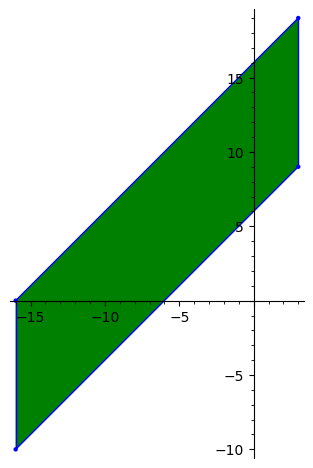

integral of x_1^2 over generalized polytrope:
This function prints out how each hyperplane is shifted from Ax + b' >= 0 to Ax + (b + h) >= 0. To disable, set suppress_output = True. If fixed = True, then b is fixed at b' instead of being a general variable of the form b_i_j.
An inequality (-1, 0) x + 3 >= 0 transformed into generic hyperplane (-1, 0)x + b_1 + h_1 >= 0
An inequality (-1, 1) x - 6 >= 0 transformed into generic hyperplane (-1, 1)x + b_2 + h_2 >= 0
An inequality (1, 0) x + 16 >= 0 transformed into generic hyperplane (1, 0)x + b_3 + h_3 >= 0
An inequality (1, -1) x + 16 >= 0 transformed into generic hyperplane (1, -1)x + b_4 + h_4 >= 0
(-1/24*((b_1 + b_3 + h_1 + h_3)^2 - (b_1 - b_3 + h_1 - h_3)^2 - 6*(b_1 + h_1)^2 - 2*(b_3 + h_3)^2)*(b_1 + b_3 + h_1 + h_3)*(b_2 + b_4 + h_2 + h_4) + 1/24*((b_1 - b_2 + b_3 - b_4 + h_1 - h_2 + h_3 - h_4)*(b_1 + b_3 + h_1 + h_3) - (b_1 + b_3 + h_1 + h_3)^2)*((b_1 + b_3 + h_1 + h_3)^2 - (b_1 - b_3 + h_1 - h_3)^2 - 2*(b_1 + h_1)^2 - 6*(b_3 + h_3)

In [10]:
## MAIN FUNCTIONS - takes a homogeneous polynomial w over our dim_polytope-dimensional ring R_vars and 
# integrates it over an arbitrary dim_polytope-dimensional integral smooth polytope P_A(b + h). 
# The final output polynomials are in terms of b_ks (correspond to each hyperplane of smooth P_A(b + h)) 
# and h_i_js (in Todd_count, h_i_js are all set to 0 by the end)

## computes the integral of w(x_1, ..., x_(dim_polytope)) homogeneous in R_vars over an arbitrary (dim_polytope)-dimensional integral 
# smooth polytope P_A(b + h) with P having the same combinatorial type as the smooth polytope with vertices P_vertices.
# INPUT: w is a homogeneous weight polynomial in R_vars
# INPUT: P is a fixed smooth polytope - Polyhedron in SageMath.
# INPUT: suppress_output - If True, ignore any print statements from generic_integral_smooth_polytope. Set to False by default.
# INPUT: fixed - If True, then do not generalize right triangle (add in b_i_j) and just keep original polytope and set of vertices. Set to False by default.
# Note that this will just return the weighted count of the original polytope P.

def integral_smooth_polytope_shifted_by_h(w, P, suppress_output = False, fixed = False):
    
    #Compute a triangulation of P.
    PointConfiguration.set_engine('internal')
    points = PointConfiguration(P.Vrepresentation())
    triangulation = points.triangulate()

    #Transform P (defined by P_vertices) into a generic smooth polytope by replacing the inequalities Ax + b >= 0
    # (defined by specific values b forming P) with Ax + (b_k + h_k) >= 0.
    Ph_vertices, b_k_variables, h_variables= generic_integral_smooth_polytope(P, suppress_output, fixed)

    #For some reason, P.Vrepresentation()[i] is immutable, so we make our own mutable copy.
    P_vertices = []
    for vertex in P.Vrepresentation():
        new_vertex = [0] * (dim(P))
        for j in range(dim(P)):
            new_vertex[j] = vertex[j]
        P_vertices.append(new_vertex)
    
    # Over all simplices part of P(b + h), compute the integral of w over each simplex.
    sum = 0
    for simplex_selection in triangulation:
        # NOTE FROM DEVS: Based off order of triangulation, the vertices are always clockwise, so the sign will always be (-1)^(dim+1).
        sign_of_volume = sgn(volume_simplex(list(map(lambda i : P_vertices[i], simplex_selection))))
        sum += sign_of_volume * integral_simplex(w, list(map(lambda i : Ph_vertices[i], simplex_selection)))
    return sum, b_k_variables, h_variables

## applies Todd operator to integral of w(x_1, ..., x_(dim_polytope)) over an arbitrary integral smooth polytope P(h)
# with P having the same combinatorial type as the integral smooth polytope with vertices P_vertices.
# This should result in the weighted integer point count by weighted K-P.
# INPUT: w is a homogeneous weight polynomial in R_vars
# INPUT: P a fixed smooth polytope - Polyhedron in SageMath.
# INPUT: suppress_output - If True, ignore any print statements from generic_integral_smooth_polytope. Set to False by default.
# INPUT: fixed - If True, then do not generalize right triangle (add in b_i_j) and just keep original polytope and set of vertices. Set to False by default.
# Note that this will just return the weighted count of the original polytope P.

def Todd_smooth_polytope(w, P, suppress_output = False, fixed = False):
    f, b_k_variables, h_variables = integral_smooth_polytope_shifted_by_h(w, P, suppress_output, fixed)
    g = Todd_multivariate(f, h_variables)
    # This is merely to set the h variables equal to 0, nothing else fancy to it.
    h_vars_dict = {}
    for item in h_variables:
        h_vars_dict[item] = 0
    return g(h_vars_dict).expand()

# Sample runs of the above code. 
test_polytrope = random_polytrope(2)
test_polytrope.show()
print("integral of x_1^2 over generalized polytrope:")
print(integral_smooth_polytope_shifted_by_h(R_vars(x_1^2), test_polytrope, suppress_output = False, fixed = False))
print()
print("Todd operator applied on above integral, should result in weighted point count:")
print(Todd_smooth_polytope(R_vars(x_1^2), test_polytrope, suppress_output = False, fixed = False))
print()
print("Same case as above, but polytope is fixed instead of general:")
print(Todd_smooth_polytope(R_vars(x_1^2), test_polytrope, suppress_output = False, fixed = True))

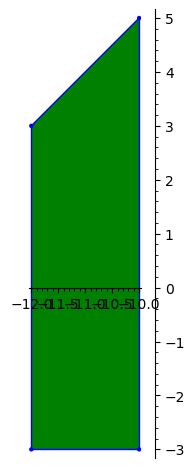

This code should do the same as the previous block, but the variables changed to the appropriate corresponding inequality
integral of x_1^2 over generalized polytrope:
This function prints out how each hyperplane is shifted from Ax + b' >= 0 to Ax + (b + h) >= 0. To disable, set suppress_output = True. If fixed = True, then b is fixed at b' instead of being a general variable of the form b_i_j.
An inequality (-1, 0) x - 10 >= 0 transformed into generic hyperplane (-1, 0)x + b_1 + h_1 >= 0
An inequality (1, 0) x + 12 >= 0 transformed into generic hyperplane (1, 0)x + b_2 + h_2 >= 0
An inequality (1, -1) x + 15 >= 0 transformed into generic hyperplane (1, -1)x + b_3 + h_3 >= 0
An inequality (0, 1) x + 3 >= 0 transformed into generic hyperplane (0, 1)x + b_4 + h_4 >= 0
(-1/24*((b_1_3 + b_3_1 + h_1 + h_2)^2 - (b_1_3 - b_3_1 + h_1 - h_2)^2 - 6*(b_1_3 + h_1)^2 - 2*(b_3_1 + h_2)^2)*(b_1_3 + b_2_1 + b_3_2 + h_1 + h_3 + h_4)*(b_1_3 + b_3_1 + h_1 + h_2) - 1/24*((b_1_3 + b_2_1 + b_3_2 + h_1 + h_3

In [11]:
## MAIN FUNCTIONS - takes a homogeneous polynomial w over our dim_polytope-dimensional ring R_vars and 
# integrates it over an arbitrary dim_polytope-dimensional integral alcoved polytope P_A(b + h). 
# The final output polynomials are in terms of b_i_js (correspond to each hyperplane of alcoved P_A(b + h)) 
# and h_i_js (in Todd_count, h_i_js are all set to 0 by the end)

## computes the integral of w(x_1, ..., x_(dim_polytope)) homogeneous in R_vars over an arbitrary (dim_polytope)-dimensional integral 
# alcoved polytope P_A(b + h) with P having the same combinatorial type as the smooth polytope with vertices P_vertices.
# INPUT: w is a homogeneous weight polynomial in R_vars
# INPUT: P is a fixed alcoved polytope - Polyhedron in SageMath.
# INPUT: suppress_output - If True, ignore any print statements from generic_integral_smooth_polytope. Set to True by default, as we know the hyperplanes of an alcoved polytope.
# INPUT: fixed - If True, then do not generalize right triangle (add in b_i_j) and just keep original polytope and set of vertices. Set to False by default.
# Note that this will just return the weighted count of the original polytope P.

def integral_alcoved_polytope_shifted_by_h(w, P, suppress_output = True, fixed = False):
    # Compute integral_smooth_polytope_shifted_by_h
    int, b_k_variables, h_variables = integral_smooth_polytope_shifted_by_h(w, P, suppress_output, fixed)
    # Create dict between b_k_variables and new b_i_j variables
    dict_between_b_k_to_b_i_j = {}
    # Create list of b_i_j_variables.
    b_i_j_variables = []
    # For each b_k, read in it's corresponding hyperplane x_i - x_j <= b_k, and map b_k to b_i_j
    k = 1
    for hyp in P.Hrepresentation():
        #Inequality is of the form x_i - x_j <= b_{ij}. SageMath's notation is to interpret inequality tuple (b, A) as Ax + b >= 0
        #So in our case, our inequality can be rewritten as x_j - x_i + b_{ij} >= 0. We search for the indices i and j respectively.
        #If they are not found, their default value is dim_polytope+1
        hyp_normal = hyp.A()
        i_index = dim(P)+1
        j_index = dim(P)+1
        for m in range(len(hyp_normal)):
            if hyp_normal[m] == -1:
                i_index = m+1
            elif hyp_normal[m] == 1:
                j_index = m+1

        # Create variable b_i_j and map b_k to it in our dict. Append to b_i_j_variables. Update k index.
        dict_between_b_k_to_b_i_j[var('b_' + str(k))] =  var('b_' + str(i_index) + '_' + str(j_index))
        b_i_j_variables.append(var('b_' + str(i_index) + '_' + str(j_index)))
        k += 1

    # Use subs to change all a_variables into respective variables
    return int.subs(dict_between_b_k_to_b_i_j), b_i_j_variables, h_variables

## applies Todd operator to integral of w(x_1, ..., x_(dim_polytope)) over an arbitrary integral alcoved polytope P(h)
# with P having the same combinatorial type as the integral smooth polytope with vertices P_vertices.
# This should result in the weighted integer point count by weighted K-P.
# INPUT: w is a homogeneous weight polynomial in R_vars
# INPUT: P a fixed alcoved polytope - Polyhedron in SageMath.
# INPUT: suppress_output - If True, ignore any print statements from generic_integral_smooth_polytope. Set to True by default, as we already know the facets of an alcoved polytope.
# INPUT: fixed - If True, then do not generalize right triangle (add in b_i_j) and just keep original polytope and set of vertices. Set to False by default.
# Note that this will just return the weighted count of the original polytope P.

def Todd_alcoved_polytope(w, P, suppress_output = True, fixed = False):
    f, b_i_j_variables, h_variables = integral_alcoved_polytope_shifted_by_h(w, P, suppress_output, fixed)
    g = Todd_multivariate(f, h_variables)
    # This is merely to set the h variables equal to 0, nothing else fancy to it.
    h_vars_dict = {}
    for item in h_variables:
        h_vars_dict[item] = 0
    return g(h_vars_dict).expand()

# Sample runs of the above code. 
test_polytrope = random_polytrope()
test_polytrope.show()
print("This code should do the same as the previous block, but the variables changed to the appropriate corresponding inequality")
print("integral of x_1^2 over generalized polytrope:")
print(integral_alcoved_polytope_shifted_by_h(R_vars(x_1^2), test_polytrope, suppress_output = False, fixed = False))
print()
print("Todd operator applied on above integral, should result in weighted point count:")
print(Todd_alcoved_polytope(R_vars(x_1^2), test_polytrope, suppress_output = False, fixed = False))
print()
print("Same case as above, but polytope is fixed instead of general:")
print(Todd_alcoved_polytope(R_vars(x_1^2), test_polytrope, suppress_output = False, fixed = True))

## Examples and Tests Of Our Weighted Count Algorithm
A set of examples for 2D alcoved polytopes, a series of tests verifying the weighted count algorithm is accurate, and a random example for 3D alcoved polytopes, also used to demonstrate `change_global_variables`. Tests are disabled by default, but can be enabled by setting `omit_testing = False` below.

In [12]:
## FIXED EXAMPLES FOR 2D POLYTOPES

## EXAMPLE 1: Generic alcoved polytope, x_1 * x_2.
print("Example 1: Generic 2D alcoved polytope (named alcoved_polytope), Weight x_1 * x_2")

# Define a weight in terms of R_vars
w = R_vars(x_1 * x_2)

# Define a 2D alcoved polytope. 
alcoved_polytope = Polyhedron(vertices = [[1, 1], [1, 2], [2, 3], [3, 3], [3, 2], [2, 1]])
#alcoved_polytope = Polyhedron(ieqs= [[-1, 1, 0], [-1, 0, 1], [1, 1, -1], [1, -1, 1], [3, -1, 0], [3, 0, -1]])
#alcoved_polytope.plot()

# Calculate the Todd operator of the integral of w(x) over P(h), evaluate at 0
f = Todd_smooth_polytope(w, alcoved_polytope)
print("Our count by evaluating Todd_smooth_polytope at b corresponding to alcoved_polytope:")
print(f(b_1 = -1, b_2 = -1, b_3 = 1, b_4 = 1, b_5 = 3, b_6 = 3))
print("Manual count by summing w(p) for each p in alcoved_polytope:")
print(sum(w(p[0], p[1]) for p in alcoved_polytope.integral_points()))
print()

print("Our count by evaluating Todd_smooth_polytope at 3*b corresponding to 3*alcoved_polytope:")
print(f(b_1 = -3, b_2 = -3, b_3 = 3, b_4 = 3, b_5 = 9, b_6 = 9))
print("Manual count by summing w(p) for each p in 3*alcoved_polytope:")
print(sum(w(p[0], p[1]) for p in (3*alcoved_polytope).integral_points()))
print()

print("Printing output from Todd_smooth_polytope:")
print(f)
print("Printing output from Todd_alcoved_polytope (all b_k should be replaced with b_i_j):")
print(Todd_alcoved_polytope(w, alcoved_polytope, suppress_output = True, fixed = False))
print()

## EXAMPLE 2: Degenerate alcoved polytope, x_1^2 * x_2
## We use our polytrope function here.
print("Example 2: Degenerate alcoved polytope (named P), Weight x_1^2 * x_2")

A=[[0,3,4], [0,0,2], [1,4,0]]
w=R_vars(x_1^2*x_2)
P = polytrope(A) #feed in A in order to get our degenerate alcoved polytope.
P.plot()

f = Todd_alcoved_polytope(w, P, suppress_output = False, fixed = False)
print("Our count by evaluating Todd_alcoved_polytope at b corresponding to P:")
print(f(b_1_2 = 3, b_1_3 = 4, b_2_1 = 0, b_2_3 = 2, b_3_1 = 1)) #Note that b_3_2 is degenerate, so we omit it.
print("Manual count by summing w(p) for each p in P:")
print(sum(w(p[0], p[1]) for p in P.integral_points()))
print()

print("Our count by evaluating Todd_alcoved_polytope at 4*b corresponding to 4*P:")
print(f(b_1_2 = 12, b_1_3 = 16, b_2_1 = 0, b_2_3 = 8, b_3_1 = 4)) #Note that b_3_2 is degenerate, so we omit it.
print("Manual count by summing w(p) for each p in 4*P:")
print(sum(w(p[0], p[1]) for p in (4*P).integral_points()))

print("Printing output from Todd_alcoved_polytope (all b_k should be replaced with b_i_j):")
print(f)
print("Printing output from Todd_smooth_polytope:")
print(Todd_smooth_polytope(w, P, suppress_output = True, fixed = False))
print()


Example 1: Generic 2D alcoved polytope (named alcoved_polytope), Weight x_1 * x_2
This function prints out how each hyperplane is shifted from Ax + b' >= 0 to Ax + (b + h) >= 0. To disable, set suppress_output = True. If fixed = True, then b is fixed at b' instead of being a general variable of the form b_i_j.
An inequality (1, 0) x - 1 >= 0 transformed into generic hyperplane (1, 0)x + b_1 + h_1 >= 0
An inequality (0, 1) x - 1 >= 0 transformed into generic hyperplane (0, 1)x + b_2 + h_2 >= 0
An inequality (1, -1) x + 1 >= 0 transformed into generic hyperplane (1, -1)x + b_3 + h_3 >= 0
An inequality (-1, 1) x + 1 >= 0 transformed into generic hyperplane (-1, 1)x + b_4 + h_4 >= 0
An inequality (-1, 0) x + 3 >= 0 transformed into generic hyperplane (-1, 0)x + b_5 + h_5 >= 0
An inequality (0, -1) x + 3 >= 0 transformed into generic hyperplane (0, -1)x + b_6 + h_6 >= 0
Our count by evaluating Todd_smooth_polytope at b corresponding to alcoved_polytope:
30
Manual count by summing w(p) for e

In [13]:
## TESTING LOTS OF RANDOM EXAMPLES TO VERIFY CODE

## We generate a random weight and random polytrope n times to verify the accuracy of our code.
## Warning: slow for dim_polytope >= 3
def test_Todd(n):
    for i in range(n):
        # Generate random polytope.
        P=random_polytrope(2)
        
        # Let k be a random integer, we will dilate P by this amount.
        k = randint(0, 10)
        
        # We create rhs_dict to store the right hand side of each of the inequalities, we'll plug this back later
        # into Todd_smooth_polytope to verify that our polynomial returns the right value.
        # We multiply by k since that represents dilation by k.
        rhs_dict = {}
        current_index = 1
        for hyp in P.Hrepresentation():
            rhs_dict[var('b_' + str(current_index))] = k * hyp.b()
            current_index += 1

        # Generate random weight.
        a=randint(0,2); b=randint(0,2)
        w=R_vars(x_1^a*x_2^b) ## random monomial weight x^a*y^b, degree <=4

        # Calculate Todd count and real count for a random dilate of P, kP.
        todd_count = Todd_smooth_polytope(w, P, suppress_output = True, fixed = False).subs(rhs_dict)
        real_count = sum(w(*p) for p in (k*P).integral_points())
        if todd_count != real_count: raise ValueError("TEST FAILED!", "P was:", str(P), "w was:", str(w), "Todd count was:", str(todd_count), "real count was:", str(real_count))
        if i % 10 == 0:
            print(i)

# Can enable testing by changing this line.
omit_testing = True

if not omit_testing:
    test_Todd(500)
else:
    print("Tests omitted")

Tests omitted


In [14]:
## A random test in 3D, demonstrating the ability of our function in other dimensions.
# This also demonstrates and tests update_global_variables, which must be run before changing dimension.

# Change R_vars and variables to 3D
update_global_variables(3)

print("Example: Random 3D alcoved polytope, w = x_1 * x_2 * x_3")
w=R_vars(x_1*x_2*x_3)
P = random_polytrope(3) #feed in A in order to get our degenerate alcoved polytope.
P.show()
print()

f = Todd_alcoved_polytope(w, P, suppress_output = False, fixed = False)
print("Printing output from Todd_alcoved_polytope (all b_k should be replaced with b_i_j):")
print(f)
print()
print("Printing output from Todd_smooth_polytope:")
print(Todd_smooth_polytope(w, P, suppress_output = True, fixed = False))
print()

# Change back R_vars and variables to 2D
update_global_variables(2)

Example: Random 3D alcoved polytope, w = x_1 * x_2 * x_3


Graphics3d Object


This function prints out how each hyperplane is shifted from Ax + b' >= 0 to Ax + (b + h) >= 0. To disable, set suppress_output = True. If fixed = True, then b is fixed at b' instead of being a general variable of the form b_i_j.
An inequality (1, 0, 0) x - 5 >= 0 transformed into generic hyperplane (1, 0, 0)x + b_1 + h_1 >= 0
An inequality (-1, 0, 1) x + 6 >= 0 transformed into generic hyperplane (-1, 0, 1)x + b_2 + h_2 >= 0
An inequality (-1, 1, 0) x + 20 >= 0 transformed into generic hyperplane (-1, 1, 0)x + b_3 + h_3 >= 0
An inequality (0, -1, 0) x - 4 >= 0 transformed into generic hyperplane (0, -1, 0)x + b_4 + h_4 >= 0
An inequality (0, 1, 0) x + 8 >= 0 transformed into generic hyperplane (0, 1, 0)x + b_5 + h_5 >= 0
An inequality (0, 0, -1) x + 9 >= 0 transformed into generic hyperplane (0, 0, -1)x + b_6 + h_6 >= 0
Printing output from Todd_alcoved_polytope (all b_k should be replaced with b_i_j):
-1/240*b_1_2^6 + 1/60*b_1_2^5*b_1_3 - 1/48*b_1_2^4*b_1_3^2 + 1/48*b_1_2^2*b_1_3^4 

## Converting Weighted Integer Point Count to Weighted Ehrhart and $h^{*}$ Polynomials

### NOTE TO USER: We defined the parameter fixed in the above case in case the user wanted to compute the weighted count of the original polytope. From here on out, we always assume fixed = False and thus omit it from the function call.

### These functions take the weighted count functions for both alcoved and smooth polytopes and output the corresponding weighted Ehrhart/h* polynomials.

Example: Alcoved polytope, w = x_1 * x_2


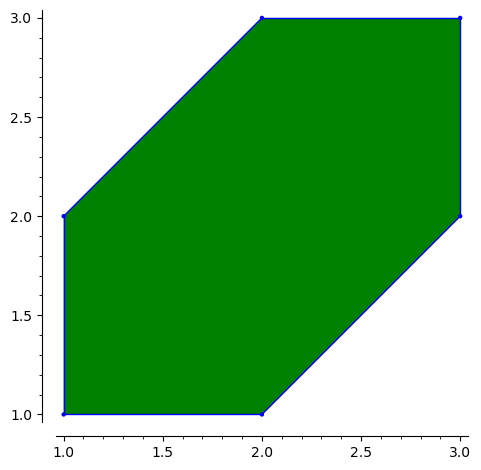

Weighted Ehrhart polynomial
-1/6*b_1_2^3*t^3 + 1/2*b_1_2*b_1_3^2*t^3 - 1/3*b_1_3^3*t^3 + 1/6*b_2_1^3*t^3 + 1/2*b_1_3^2*b_2_3*t^3 - 1/2*b_2_1^2*b_2_3*t^3 + 1/2*b_2_1*b_2_3^2*t^3 - 1/6*b_2_3^3*t^3 - 1/2*b_2_1*b_3_1^2*t^3 + 1/3*b_3_1^3*t^3 + 1/2*b_1_2^2*b_3_2*t^3 - 1/2*b_3_1^2*b_3_2*t^3 - 1/2*b_1_2*b_3_2^2*t^3 + 1/6*b_3_2^3*t^3 + 1/2*b_1_2*b_1_3*t^2 + 1/2*b_1_3*b_2_3*t^2 - 1/2*b_2_1*b_3_1*t^2 - 1/2*b_3_1*b_3_2*t^2 + 1/6*b_1_2*t + 1/3*b_1_3*t - 1/6*b_2_1*t + 1/6*b_2_3*t - 1/3*b_3_1*t - 1/6*b_3_2*t

Weighted h* polynomial
-1/6*b_1_2^3*z^3 + 1/2*b_1_2*b_1_3^2*z^3 - 1/3*b_1_3^3*z^3 + 1/6*b_2_1^3*z^3 + 1/2*b_1_3^2*b_2_3*z^3 - 1/2*b_2_1^2*b_2_3*z^3 + 1/2*b_2_1*b_2_3^2*z^3 - 1/6*b_2_3^3*z^3 - 1/2*b_2_1*b_3_1^2*z^3 + 1/3*b_3_1^3*z^3 + 1/2*b_1_2^2*b_3_2*z^3 - 1/2*b_3_1^2*b_3_2*z^3 - 1/2*b_1_2*b_3_2^2*z^3 + 1/6*b_3_2^3*z^3 - 2/3*b_1_2^3*z^2 + 2*b_1_2*b_1_3^2*z^2 - 4/3*b_1_3^3*z^2 + 2/3*b_2_1^3*z^2 + 2*b_1_3^2*b_2_3*z^2 - 2*b_2_1^2*b_2_3*z^2 + 2*b_2_1*b_2_3^2*z^2 - 2/3*b_2_3^3*z^2 - 2*b_2_1*b_3_1^2*

In [15]:
## HELPER FUNCTIONS: convert weighted count -> weighted Ehrhart/h* polnyomials.

# Necessary import
var('t')
var('z')
from sage.combinat.combinat import eulerian_polynomial

## Computes weighted integer point count (see Todd_smooth_polytope) and converts it into the weighted Ehrhart polynomial
# by evaluating the weighted count polynomial at the t^th dilate of P, obtained by substituting in b_k = t * b_k.
# INPUT: w is a homogeneous weight polynomial in R_vars
# INPUT: P a fixed smooth polytope - Polyhedron in SageMath.
# INPUT: suppress_output - If True, ignore any print statements from generic_integral_smooth_polytope. Set to False by default.
def weighted_ehrhart_polynomial_smooth(w, P, suppress_output = True):
    weighted_count_polynomial = Todd_smooth_polytope(w, P, suppress_output)
    
    # We create rhs_dict to replace each b_k with t * b_k.
    rhs_dict = {}
    for var in weighted_count_polynomial.variables():
        rhs_dict[var] = t * var

    # Now we get the weighted count by substituting above.
    return weighted_count_polynomial.subs(rhs_dict)

## Computes weighted integer point count (see Todd_alcoved_polytope) and converts it into the weighted Ehrhart polynomial
# by evaluating the weighted count polynomial at the t^th dilate of P, obtained by substituting in b_i_j = t * b_i_j.
# INPUT: w is a homogeneous weight polynomial in R_vars
# INPUT: P a fixed smooth polytope - Polyhedron in SageMath.
# INPUT: suppress_output - If True, ignore any print statements from generic_integral_smooth_polytope. Set to False by default.
def weighted_ehrhart_polynomial_alcoved(w, P, suppress_output = True):
    weighted_count_polynomial = Todd_alcoved_polytope(w, P, suppress_output)
    
    # We create rhs_dict to replace each b_k with t * b_k.
    rhs_dict = {}
    for var in weighted_count_polynomial.variables():
        rhs_dict[var] = t * var

    # Now we get the weighted count by substituting above.
    return weighted_count_polynomial.subs(rhs_dict)
    

## Computes weighted h* polynomial by performing a linear transformation on the coefficients of the weighted Ehrhart polynomial
# using Eulerian polynomials.
# INPUT: w is a homogeneous weight polynomial in R_vars
# INPUT: P a fixed smooth polytope - Polyhedron in SageMath.
# INPUT: suppress_output - If True, ignore any print statements from generic_integral_smooth_polytope. Set to False by default.
def weighted_hstar_from_weighted_count_smooth(w, P, suppress_output = True):
    weighted_ehrhart_polynomial = weighted_ehrhart_polynomial_smooth(w, P, suppress_output)
    # Compute degree and coefficients of weighted Ehrhart polynomial with respect to t
    deg = weighted_ehrhart_polynomial.degree(t)
    coeffs = weighted_ehrhart_polynomial.coefficients(t, sparse = False)
    # Code above computed the weighted Ehrhart coefficients, now we'll compile these to compute the weighted h* below.
    # We multiply by t to match Beck-Robins notation for the Eulerian numbers (shift all coefficients by 1 degree)
    # We substitute in z for t to match paper notation.
    return((coeffs[0]*(1-t)^(deg)+sum(coeffs[i]*eulerian_polynomial(i)*t*(1-t)^(deg-i) for i in range(1, deg+1))).expand().subs(t = z))
    

## Computes weighted h* polynomial by performing a linear transformation on the coefficients of the weighted Ehrhart polynomial
# using Eulerian polynomials.
# INPUT: w is a homogeneous weight polynomial in R_vars
# INPUT: P a fixed alcoved polytope - Polyhedron in SageMath.
# INPUT: suppress_output - If True, ignore any print statements from generic_integral_smooth_polytope. Set to False by default.
def weighted_hstar_from_weighted_count_alcoved(w, P, suppress_output = True):
    weighted_ehrhart_polynomial = weighted_ehrhart_polynomial_alcoved(w, P, suppress_output)
    # Compute degree and coefficients of weighted Ehrhart polynomial with respect to t
    deg = weighted_ehrhart_polynomial.degree(t)
    coeffs = weighted_ehrhart_polynomial.coefficients(t, sparse = False)
    # Code above computed the weighted Ehrhart coefficients, now we'll compile these to compute the weighted h* below.
    # Note that h* polynomial is in terms of z, not t.
    # We multiply by z to match Beck-Robins notation for the Eulerian numbers (shift all coefficients by 1 degree)
    # We substitute in z for t to match paper notation.
    return((coeffs[0]*(1-t)^(deg)+sum(coeffs[i]*eulerian_polynomial(i)*t*(1-t)^(deg-i) for i in range(1, deg+1))).expand().subs(t = z))

# Sample runs of above code.

# Define a 2D alcoved polytope and weight.
print("Example: Alcoved polytope, w = x_1 * x_2")
alcoved_polytope = Polyhedron(vertices = [[1, 1], [1, 2], [2, 3], [3, 3], [3, 2], [2, 1]])
alcoved_polytope.show()
w = R_vars(x_1)

# Print its weighted ehrhart and h*

print("Weighted Ehrhart polynomial")
weighted_ehrhart_pol = weighted_ehrhart_polynomial_alcoved(w, alcoved_polytope)
print(weighted_ehrhart_pol)
print()

print("Weighted h* polynomial")
weighted_hstar_pol = weighted_hstar_from_weighted_count_alcoved(w, alcoved_polytope)
print(weighted_hstar_pol)

## Results and $h^{*}$-experiments

### Non-convexity
This code demonstrates the example in our paper of the $h^{*}$-region being non-convex, i.e. an example where we deform $P$ to $P'$, but note a switch in the sign of the coefficients of $h_{tP + (1-t)P', w}^{*}$.

Non-convexity example, w = -3x + 2y.
i is 0


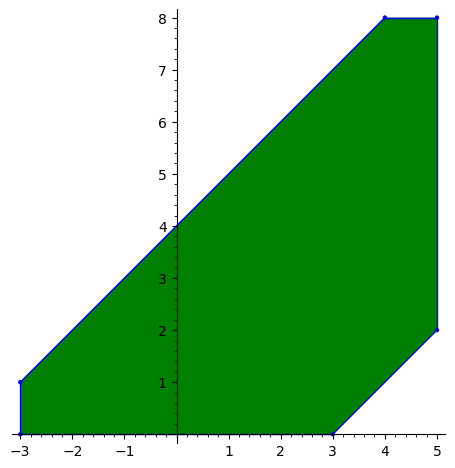

10*z^3 + 65*z^2 + 25*z

i is 1


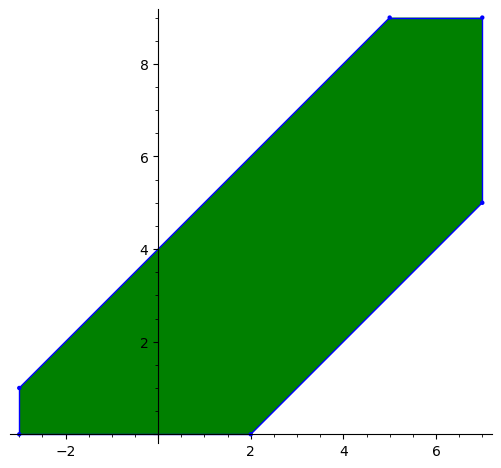

-10*z^3 - 37*z^2 - 7*z

i is 2


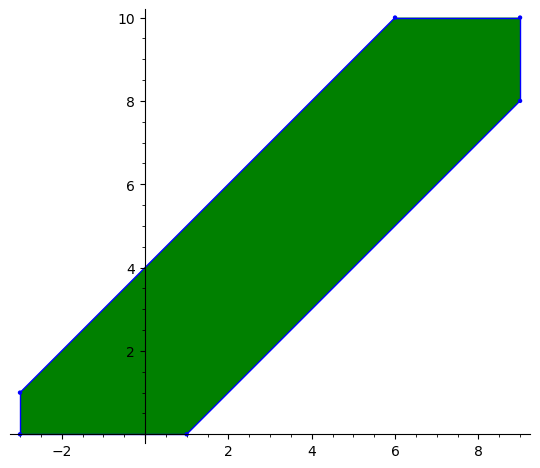

-9*z^3 - 39*z^2 - 10*z

i is 3


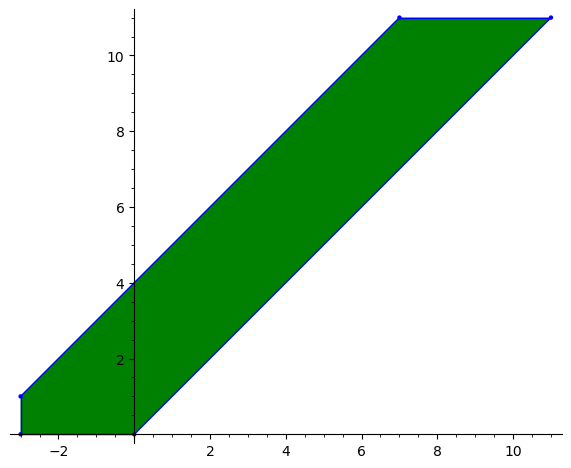

15*z^3 + 67*z^2 + 18*z



In [16]:
print("Non-convexity example, w = -3x + 2y.")
# Compute weighted h* polynomial of the generic 2D alcoved polytope
# with weight w = -3x + 2y. This will return the weighted h* polynomial
# for any two dimensional polytrope defined by the facets x_i - x_j <= b_ij.
# (Reminder: there is only one maximal type of 2D alcoved polytrope, in higher dimensions,
# it is necessary to check chosen b_ij corresponds to same maximal type.)
alcoved_polytope = polytrope([[0, 1, 1], [1, 0, 1], [1, 1, 0]])
w = R_vars(-3 * x_1 + 2 * x_2)
weighted_hstar_pol = weighted_hstar_from_weighted_count_alcoved(w, alcoved_polytope)

# Set up v and h as in paper
v = [[0, 3, 5], [4, 0, 8], [3, 0, 0]]
h = [[0, -1, 2], [0, 0, 1], [0, 0, 0]]

for i in range(4):
    print("i is", str(i))
    # Print out polytrope gotten from evaluating at b = (v + i * h)
    polytrope([[0, v[0][1] + i * h[0][1], v[0][2] + i * h[0][2]], [v[1][0] + i * h[1][0], 0, v[1][2] + i * h[1][2]], [v[2][0] + i * h[2][0], v[2][1] + i * h[2][1], 0]]).show()
    # Substitute in v + i * h into our weighted h* polynomial 
    print(weighted_hstar_pol(b_1_2 = v[0][1] + i * h[0][1], b_1_3 = v[0][2] + i * h[0][2], b_2_1 = v[1][0] + i * h[1][0],
                             b_2_3 = v[1][2] + i * h[1][2], b_3_1 = v[2][0] + i * h[2][0], b_3_2 = v[2][1] + i * h[2][1]))
    print()

### Sign patterns in the case of Dimension 2, Degree 1.
In the case of dimension 2, degree 1, we compute the hyperplane of $h_{P, w}^{*}$ spanned by $h_{P, x}^{*}$ and $h_{P, y}^{*}$ embedded in $\mathbb{R}^{3}$ (for each of the different coefficients). 

This code shows that all sign patterns of the coefficients of $h_{P, w}^{*}$ are possible. We originally conjectured that the coefficients of $h_{P, w}^{*}$ could be any sign pattern except the alternating sign pattern, however, we found some counterexamples of $h_{P, w}^{*}$ with coefficients matching the alternating sign pattern using our code below. Note that this condition is equivalent to checking the minors of the matrix generated by $h_{P, x}^{*}$ and $h_{P, y}^{*}$ to not be of the same sign. 

While we show our code for dimension 2, degree 1, we ran the above tests for all cases dimension 2, degrees 1 to 5 and dimension 3, degrees 1 to 3, and reached the same conclusion disproving our conjecture. For these examples, please see the Sign Patterns page on our website.

Functions explained below:
- Convert polynomial to dictionary extracting coefficients with respect to variable $t$
- An example of computing $h_{P, x}^{*}$ and $h_{P, y}^{*}$.
- 50 examples of computing a random $P$ and computing the normal vectors to $h_{P, x}^{*}$ and $h_{P, y}^{*}$.
- An explicit counterexample to the conjecture described above.

In [17]:
# Quick helper function as an alternative to coefficients.
# Extracts coefficients of polynomial with respect to variable z.
# INPUT: polynomial in terms of z
# INPUT: degree of said polynomial
def manual_dict(polynomial):
    degree = polynomial.degree(z)
    dict = {}
    for i in range(degree + 1):
        dict[i] = 0 # Added by default to ensure key-value pair always exists
        dict[i] = polynomial.coefficient(z^i)
    return dict

This code blocks runs for a fixed 2D alcoved polytope and enumerates over the monomials of degree 1, mainly x and y,
to calculate the set of all possible h_{P, w}^{*}.


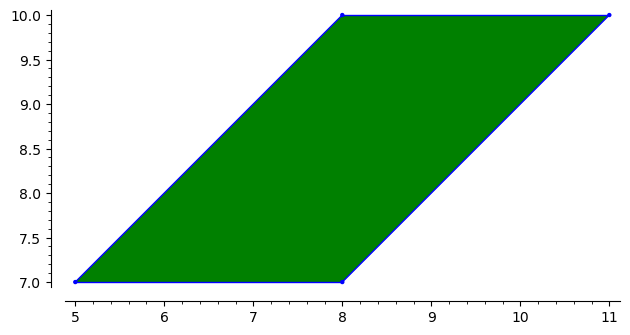

[[0, 1, 11], [2, 0, 10], [-5, -7, 0]]

Weight x_1
h* polynomial
32*z^3 + 272*z^2 + 128*z
Coefficients of h* polynomial
{0: 0, 1: 128, 2: 272, 3: 32}

Weight x_2
h* polynomial
34*z^3 + 289*z^2 + 136*z
Coefficients of h* polynomial
{0: 0, 1: 136, 2: 289, 3: 34}



In [18]:
## Computes h_{P, x}^{*} and h_{P, y}^{*} for a random 2D polytope P. 

print("""This code blocks runs for a fixed 2D alcoved polytope and enumerates over the monomials of degree 1, mainly x and y,
to calculate the set of all possible h_{P, w}^{*}.""")
# Here's a 2D random polytrope. Copies code from random_polytrope, but allows us to keep the array.
test_array = [[randint(-20, 20) for i in range(3)] for j in range(3)] # [randint(-20,20) for i in range((dim_polytope+1) * (dim_polytope))], [1, 1, 1, 1, 1, 1]
test_polytrope = polytrope(test_array)
while dim(test_polytrope) < 2:
    test_polytrope = polytrope([[randint(-20, 20) for i in range(3)] for j in range(3)])
test_array = polytrope_to_B(test_polytrope) #Squishes back degenerate b_i_j into satisfying triangle inequalities
test_polytrope.show()
print(test_array)
print()

# Gotta fill in the appropriate values.

# Weight x_1
print("Weight x_1")
w1 = R_vars(x_1)
# Here it's weighted count
weighted_count_pol = Todd_alcoved_polytope(w1, test_polytrope)(b_1_2 = test_array[0][1], b_1_3 = test_array[0][2], 
                                                               b_2_1 = test_array[1][0], b_2_3 = test_array[1][2], 
                                                               b_3_1 = test_array[2][0], b_3_2 = test_array[2][1])
# Here's its h* polynomial
print("h* polynomial")
weighted_hstar_pol = weighted_hstar_from_weighted_count_alcoved(w1, test_polytrope)(b_1_2 = test_array[0][1], b_1_3 = test_array[0][2], 
                                                                                    b_2_1 = test_array[1][0], b_2_3 = test_array[1][2], 
                                                                                    b_3_1 = test_array[2][0], b_3_2 = test_array[2][1])
print(weighted_hstar_pol)
print("Coefficients of h* polynomial")
x_dict = manual_dict(weighted_hstar_pol)
print(x_dict)
print()

# Weight x_2
print("Weight x_2")
w2 = R_vars(x_2)
# Here it's weighted count
weighted_count_pol_2 = Todd_alcoved_polytope(w2, test_polytrope)(b_1_2 = test_array[0][1], b_1_3 = test_array[0][2], 
                                                                 b_2_1 = test_array[1][0], b_2_3 = test_array[1][2], 
                                                                 b_3_1 = test_array[2][0], b_3_2 = test_array[2][1])
# Here's its h* polynomial
print("h* polynomial")
weighted_hstar_pol_2 = weighted_hstar_from_weighted_count_alcoved(w2, test_polytrope)(b_1_2 = test_array[0][1], b_1_3 = test_array[0][2], 
                                                                                      b_2_1 = test_array[1][0], b_2_3 = test_array[1][2], 
                                                                                      b_3_1 = test_array[2][0], b_3_2 = test_array[2][1])
print(weighted_hstar_pol_2)
print("Coefficients of h* polynomial")
y_dict = manual_dict(weighted_hstar_pol_2)
print(y_dict)
print()

This code blocks runs for 50 different 2D alcoved polytopes and enumerates over the monomials of degree 1, mainly x and y,
to calculate the set of all possible h_{P, w}^{*}.
Observe that h_{P, w}^{*} (when you drop degree 0 = 0)'s coefficients can be viewed as vectors in R^3. The span of all possible h_{P, w}^{*},
assuming that h_{P, x}^{*} and h_{P, y}^{*} are linearly independent, form a 2 dimensional hyperplane in R^3. This code outputs 
the normal vector (or vectors in case of linear dependence of h_{P, x}^{*} and h_{P, y}^{*}) associated with each of these hyperplanes.
We originally conjectured that the normal vector(s) would always have the alternating sign pattern, equivalently, the matrix whose
columns correspond to the coefficients of h_{P, w}^{*} over different monomials w has all d by d minors the same sign. 
However, we found relatively rare examples where this is not true.


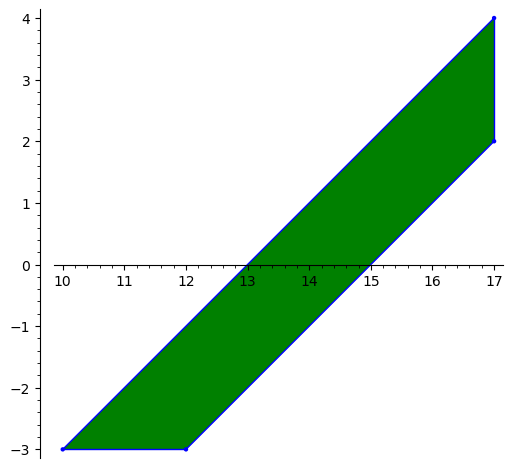


Case 1: [[0, 15, 17], [-13, 0, 4], [-10, 3, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 1 -1  5]
Minors
[-350, -70, -70]



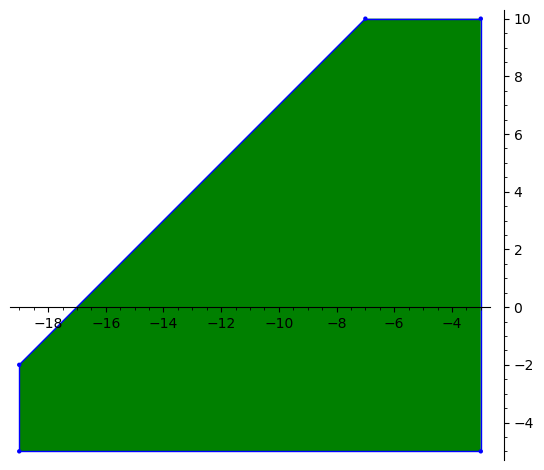


Case 2: [[0, 2, -3], [17, 0, 10], [19, 5, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 2440 -1349  2989]
Minors
[-47824, -21584, -39040]



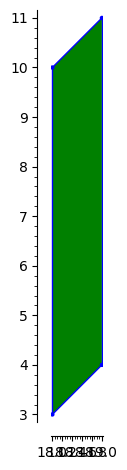


Case 3: [[0, 15, 19], [-8, 0, 11], [-18, -3, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 2 over Integer Ring
Echelon basis matrix:
[13 -8  0]
[ 0  0  1]
Minors
[0, 0, 0]



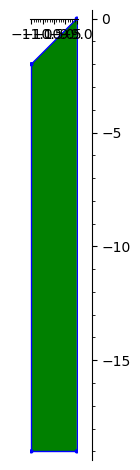


Case 4: [[0, 10, -9], [9, 0, 0], [11, 19, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 1 -1  5]
Minors
[-850, -170, -170]



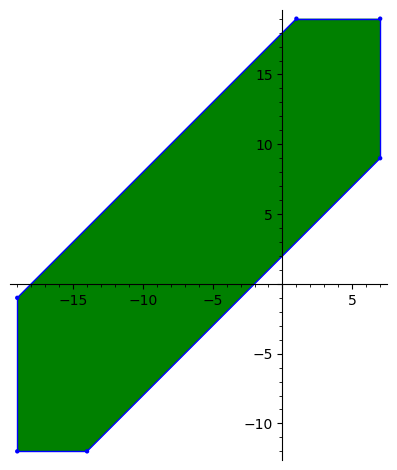


Case 5: [[0, -2, 7], [18, 0, 19], [19, 12, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[1875 -995 2112]
Minors
[-31680, -14925, -28125]



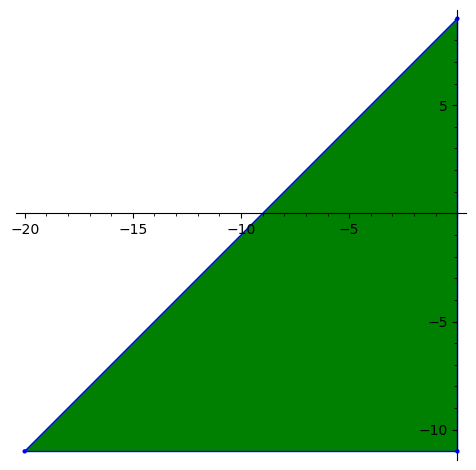


Case 6: [[0, 11, 0], [9, 0, 9], [20, 11, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 2 over Integer Ring
Echelon basis matrix:
[ 19   2 -35]
[  0   3 -14]
Minors
[0, 0, 0]



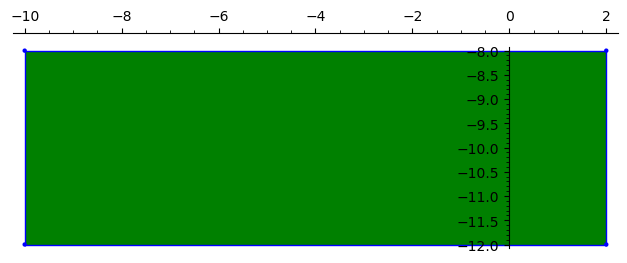


Case 7: [[0, 14, 2], [2, 0, -8], [10, 12, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 2 over Integer Ring
Echelon basis matrix:
[   1    4  -25]
[   0   33 -190]
Minors
[0, 0, 0]



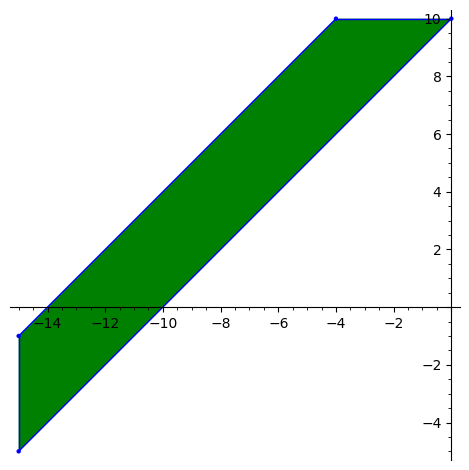


Case 8: [[0, -10, 0], [14, 0, 10], [15, 5, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 7 -5 15]
Minors
[-1650, -550, -770]



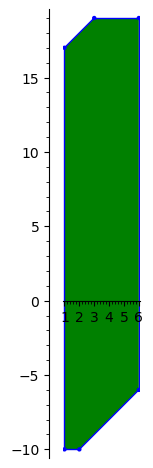


Case 9: [[0, 12, 6], [16, 0, 19], [-1, 10, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 853 -380  593]
Minors
[2372, 1520, 3412]



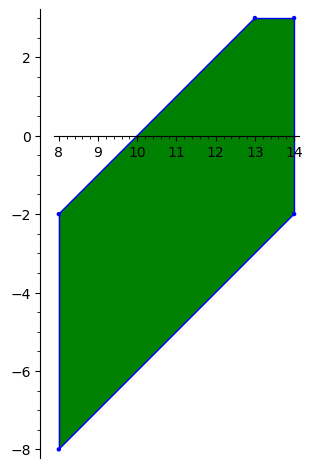


Case 10: [[0, 16, 14], [-10, 0, 3], [-8, 8, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 25 -15  36]
Minors
[4320, 1800, 3000]



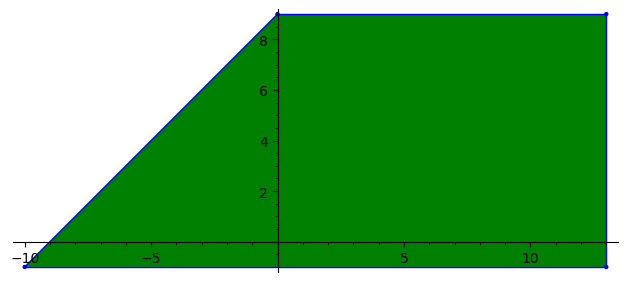


Case 11: [[0, 14, 13], [9, 0, 9], [10, 1, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 57 -33  77]
Minors
[20020, 8580, 14820]



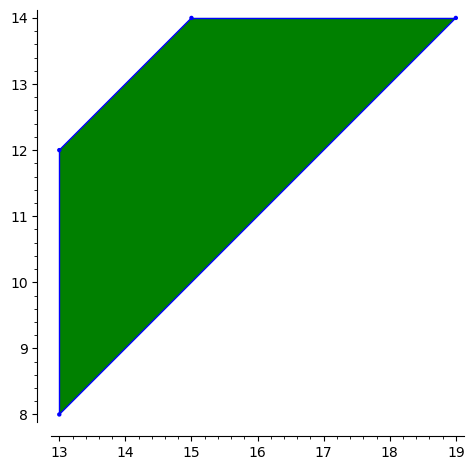


Case 12: [[0, 5, 19], [-1, 0, 14], [-13, -8, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 7 -5 15]
Minors
[1620, 540, 756]



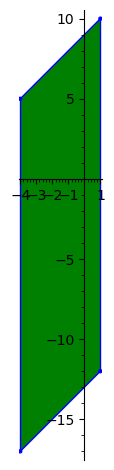


Case 13: [[0, 13, 1], [9, 0, 10], [4, 17, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 2 over Integer Ring
Echelon basis matrix:
[  1  11 -59]
[  0  14 -73]
Minors
[0, 0, 0]



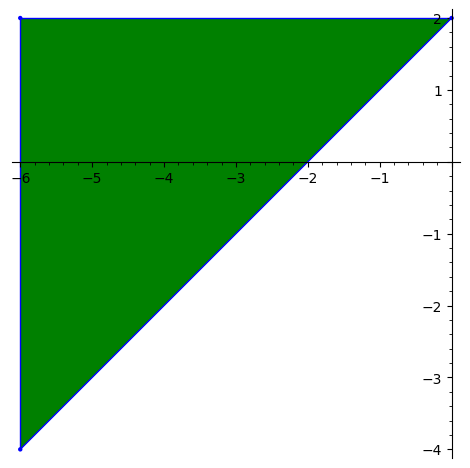


Case 14: [[0, -2, 0], [8, 0, 2], [6, 4, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 2 over Integer Ring
Echelon basis matrix:
[  5   0 -14]
[  0   1  -7]
Minors
[0, 0, 0]



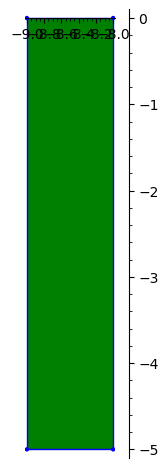


Case 15: [[0, -3, -8], [9, 0, 0], [9, 5, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 2 over Integer Ring
Echelon basis matrix:
[ 3 -2  0]
[ 0  0  1]
Minors
[0, 0, 0]



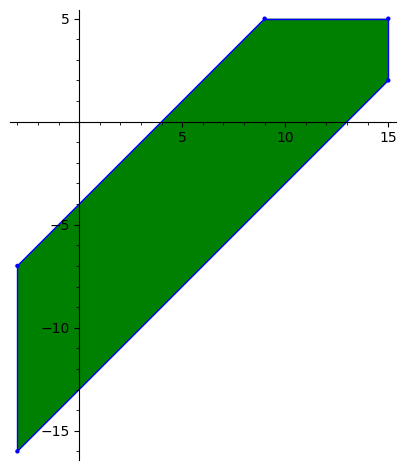


Case 16: [[0, 13, 15], [-4, 0, 5], [3, 16, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 3685 -2003  4351]
Minors
[52212, 24036, 44220]



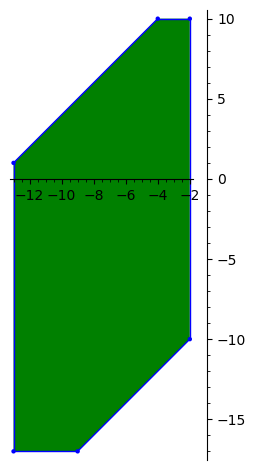


Case 17: [[0, 8, -2], [14, 0, 10], [13, 17, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 30611 -16263  34535]
Minors
[34535, 16263, 30611]



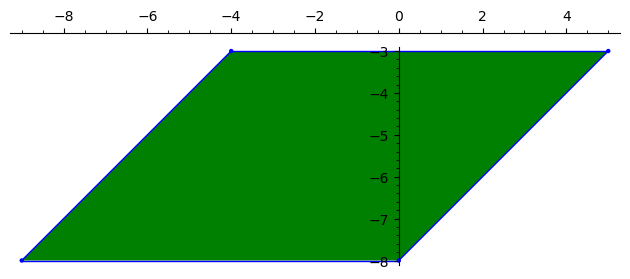


Case 18: [[0, 8, 5], [1, 0, -3], [9, 8, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 2 over Integer Ring
Echelon basis matrix:
[  1   2 -13]
[  0  16 -89]
Minors
[0, 0, 0]



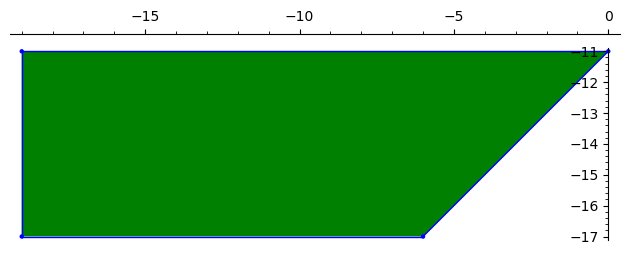


Case 19: [[0, 11, 0], [8, 0, -11], [19, 17, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 55 -35  91]
Minors
[9464, 3640, 5720]



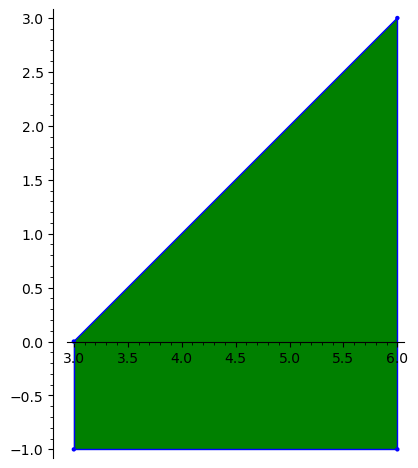


Case 20: [[0, 7, 6], [-3, 0, 3], [-3, 1, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 5 -4 14]
Minors
[-56, -16, -20]



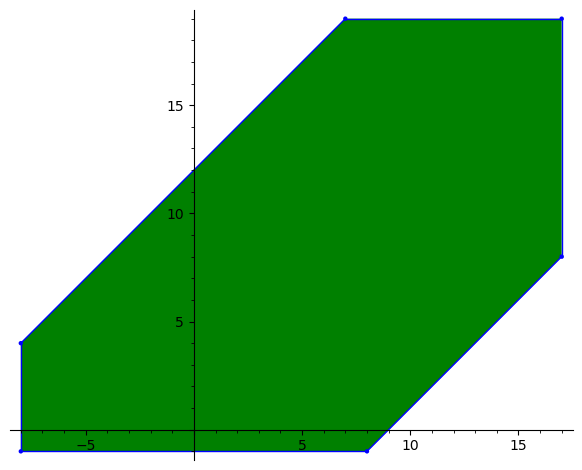


Case 21: [[0, 9, 17], [12, 0, 19], [8, 1, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[12955 -6980 15043]
Minors
[-45129, -20940, -38865]



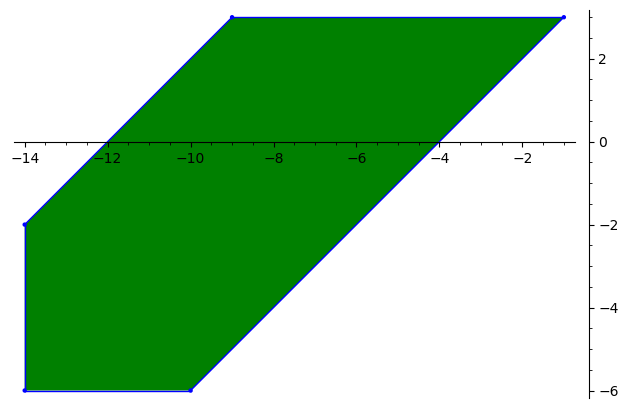


Case 22: [[0, -4, -1], [12, 0, 3], [14, 6, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 2259 -1285  2915]
Minors
[5830, 2570, 4518]



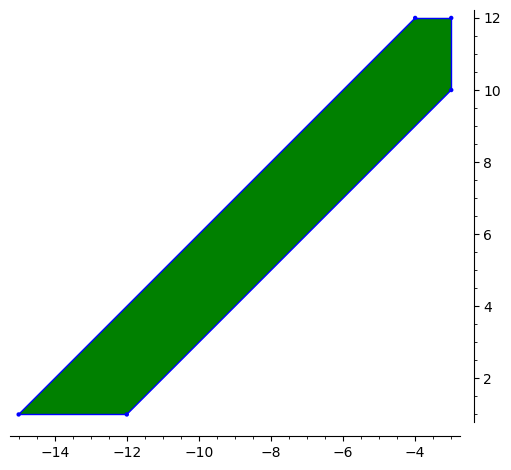


Case 23: [[0, -13, -3], [16, 0, 12], [15, -1, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 2845 -1612  3605]
Minors
[-3605, -1612, -2845]



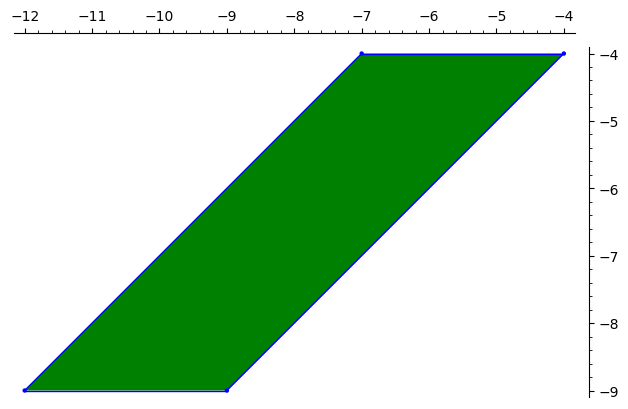


Case 24: [[0, 0, -4], [3, 0, -4], [12, 9, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 2 over Integer Ring
Echelon basis matrix:
[  1   0  -3]
[  0   4 -29]
Minors
[0, 0, 0]



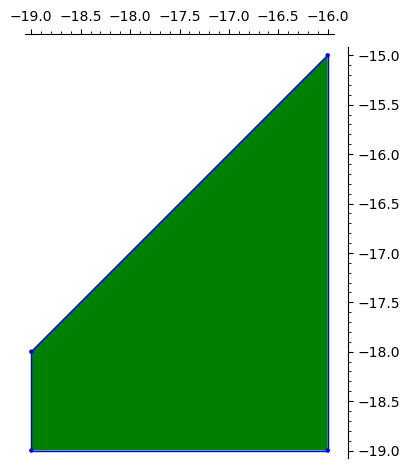


Case 25: [[0, 3, -16], [1, 0, -15], [19, 19, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 5 -4 14]
Minors
[-252, -72, -90]



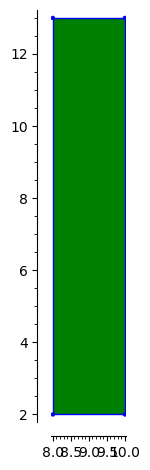


Case 26: [[0, 8, 10], [5, 0, 13], [-8, -2, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 2 over Integer Ring
Echelon basis matrix:
[  1   4 -38]
[  0   5 -43]
Minors
[0, 0, 0]



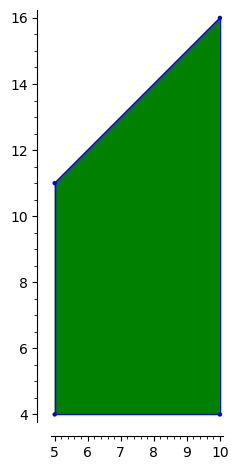


Case 27: [[0, 6, 10], [6, 0, 16], [-5, -4, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 6 -4 11]
Minors
[3850, 1400, 2100]



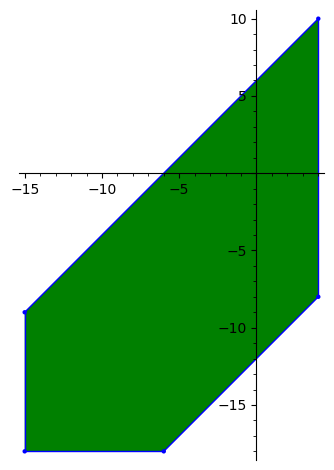


Case 28: [[0, 12, 4], [6, 0, 10], [15, 18, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[12841 -6950 15055]
Minors
[45165, 20850, 38523]



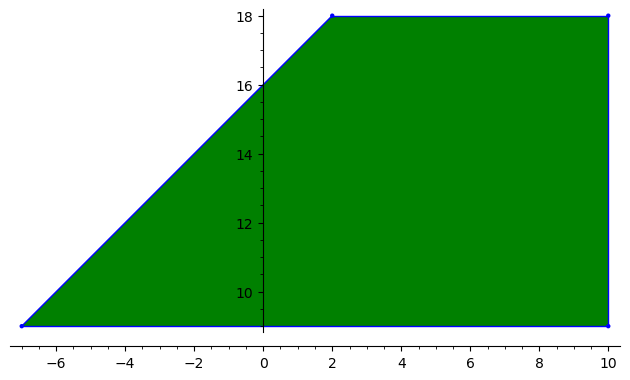


Case 29: [[0, 1, 10], [16, 0, 18], [7, -9, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 68 -40  95]
Minors
[-13680, -5760, -9792]



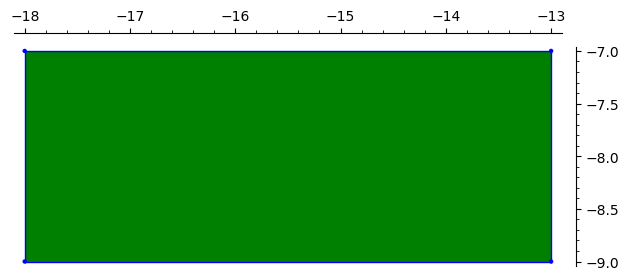


Case 30: [[0, -4, -13], [11, 0, -7], [18, 9, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 2 over Integer Ring
Echelon basis matrix:
[  1   1 -14]
[  0   2 -19]
Minors
[0, 0, 0]



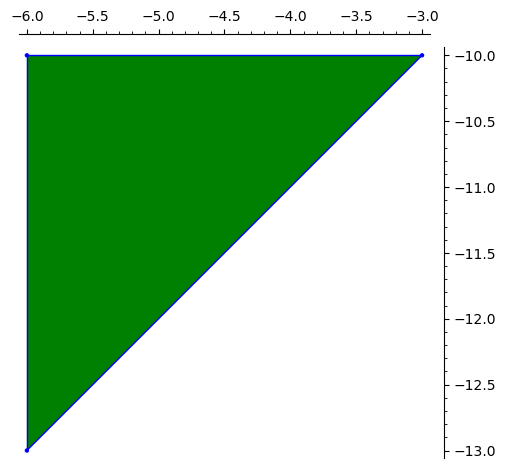


Case 31: [[0, 7, -3], [-4, 0, -10], [6, 13, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 2 over Integer Ring
Echelon basis matrix:
[  1   0 -10]
[  0   1 -16]
Minors
[0, 0, 0]



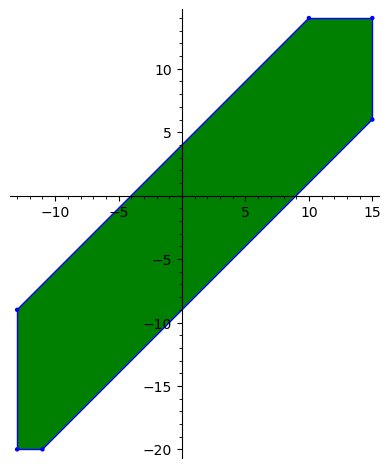


Case 32: [[0, 9, 15], [4, 0, 14], [13, 20, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 3310 -1724  3583]
Minors
[32247, 15516, 29790]



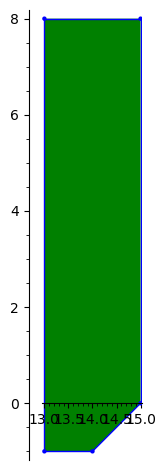


Case 33: [[0, 15, 15], [-5, 0, 8], [-13, 1, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 33 -19  42]
Minors
[-1176, -532, -924]



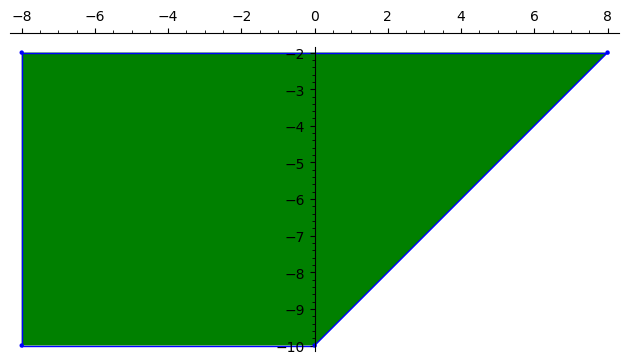


Case 34: [[0, 10, 8], [6, 0, -2], [8, 10, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 35 -21  51]
Minors
[-3264, -1344, -2240]



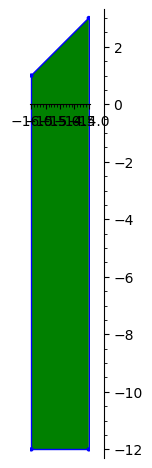


Case 35: [[0, -2, -14], [17, 0, 3], [16, 12, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 1 -1  5]
Minors
[325, 65, 65]



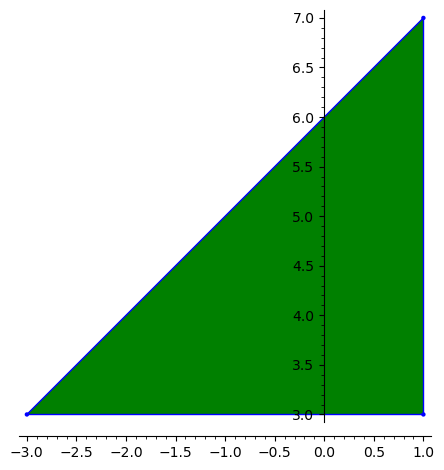


Case 36: [[0, -2, 1], [6, 0, 7], [3, -3, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 2 over Integer Ring
Echelon basis matrix:
[  1   0  -5]
[  0   1 -10]
Minors
[0, 0, 0]



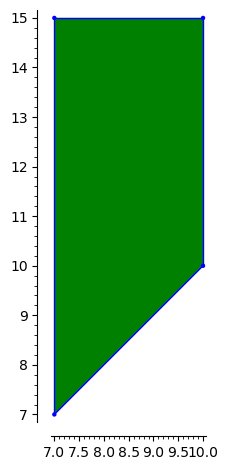


Case 37: [[0, 0, 10], [8, 0, 15], [-7, -7, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 5 -4 14]
Minors
[-1050, -300, -375]



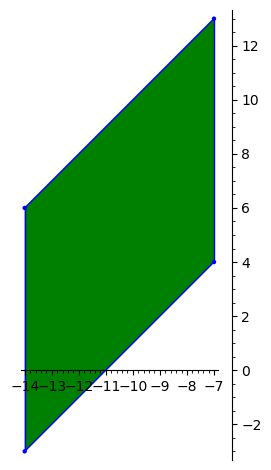


Case 38: [[0, -11, -7], [20, 0, 13], [14, 3, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 2 over Integer Ring
Echelon basis matrix:
[   1   16  -85]
[   0   24 -125]
Minors
[0, 0, 0]



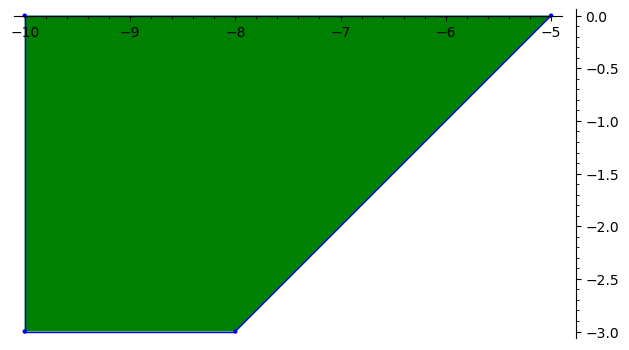


Case 39: [[0, -5, -5], [10, 0, 0], [10, 3, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 5 -4 14]
Minors
[420, 120, 150]



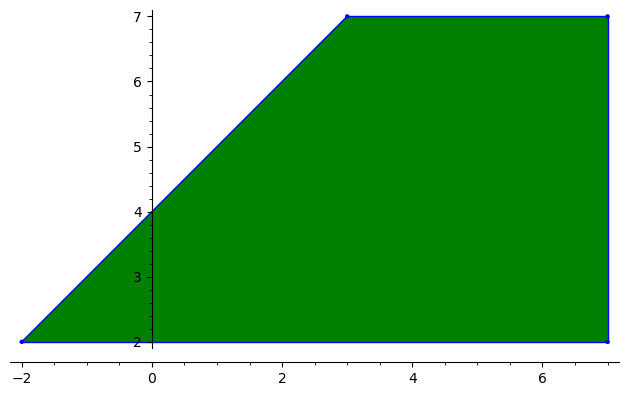


Case 40: [[0, 5, 7], [4, 0, 7], [2, -2, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 6 -4 11]
Minors
[660, 240, 360]



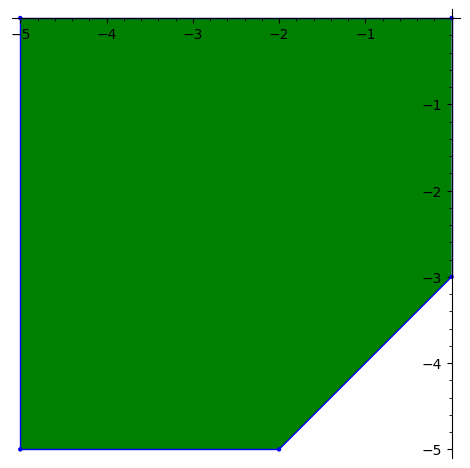


Case 41: [[0, 3, 0], [5, 0, 0], [5, 5, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 25 -16  41]
Minors
[615, 240, 375]



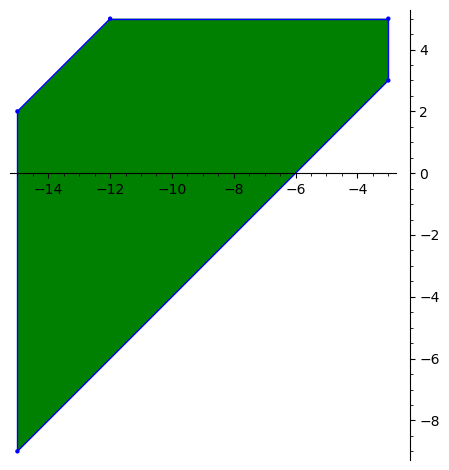


Case 42: [[0, -6, -3], [17, 0, 5], [15, 9, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 7433 -4213  9575]
Minors
[-28725, -12639, -22299]



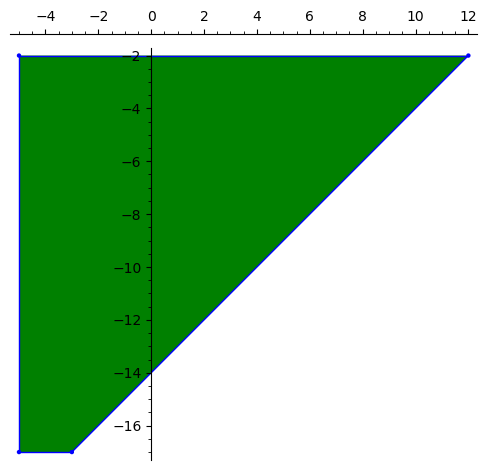


Case 43: [[0, 14, 12], [3, 0, -2], [5, 17, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 203 -112  248]
Minors
[-22320, -10080, -18270]



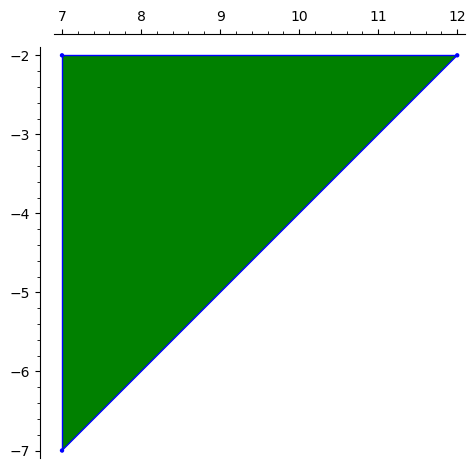


Case 44: [[0, 14, 12], [-9, 0, -2], [-7, 7, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 2 over Integer Ring
Echelon basis matrix:
[ 2  0 -7]
[ 0  1 -8]
Minors
[0, 0, 0]



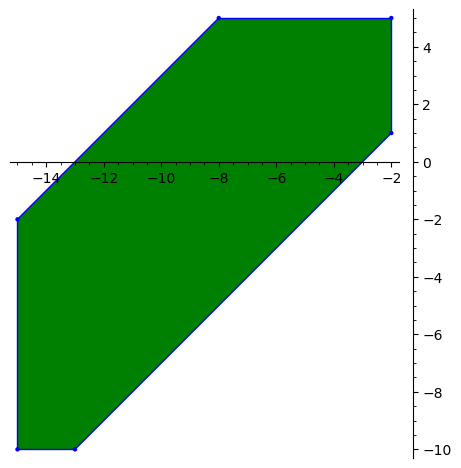


Case 45: [[0, -3, -2], [13, 0, 5], [15, 10, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 436 -251  579]
Minors
[-13896, -6024, -10464]



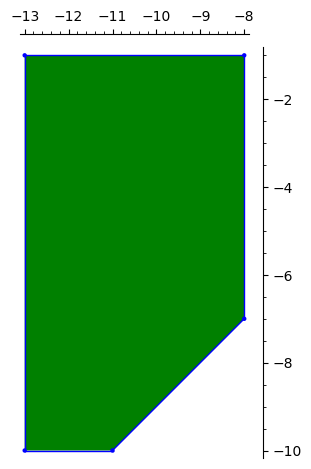


Case 46: [[0, -1, -8], [12, 0, -1], [13, 10, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 989 -577 1340]
Minors
[5360, 2308, 3956]



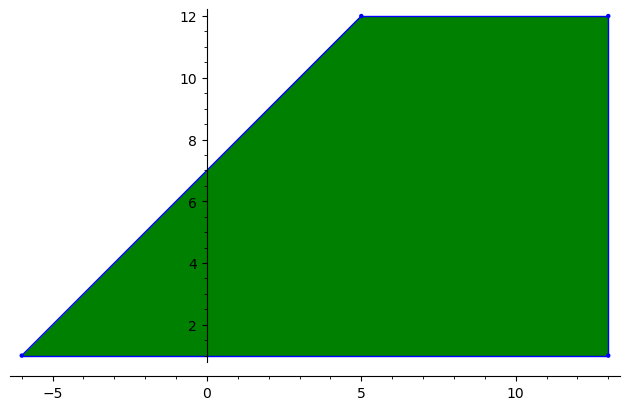


Case 47: [[0, 12, 13], [7, 0, 12], [6, -1, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 35 -20  46]
Minors
[24288, 10560, 18480]



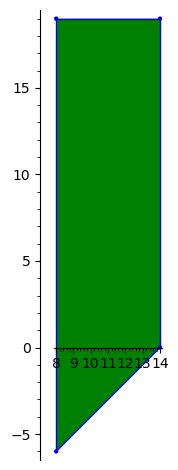


Case 48: [[0, 14, 14], [11, 0, 19], [-8, 6, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 55 -35  91]
Minors
[-8645, -3325, -5225]



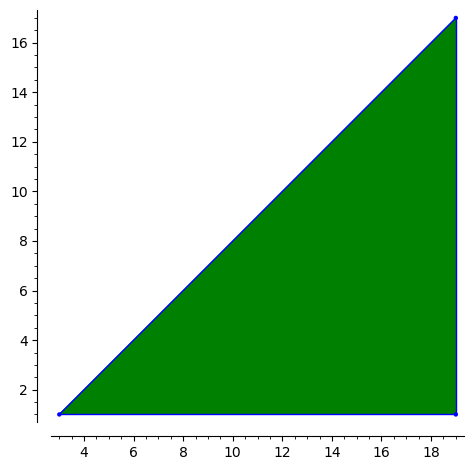


Case 49: [[0, 18, 19], [-2, 0, 17], [-3, -1, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 2 over Integer Ring
Echelon basis matrix:
[  5   2 -17]
[  0   7 -34]
Minors
[0, 0, 0]



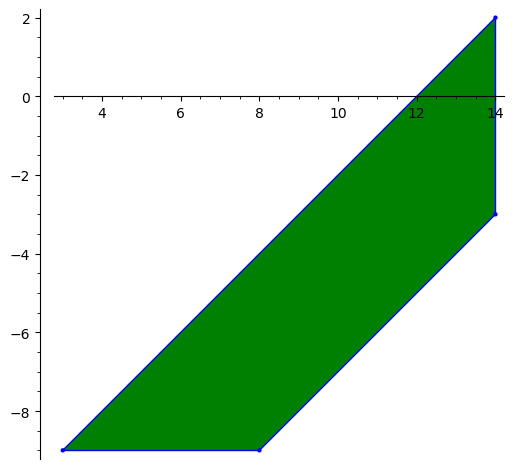


Case 50: [[0, 17, 14], [-12, 0, 2], [-3, 9, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 6 -4 11]
Minors
[-1650, -600, -900]



In [19]:
## Iterates through all h_{P, x}^{*} and h_{P, y}^{*} for a bunch of different examples of P.

print("""This code blocks runs for 50 different 2D alcoved polytopes and enumerates over the monomials of degree 1, mainly x and y,
to calculate the set of all possible h_{P, w}^{*}.""")
print("""Observe that h_{P, w}^{*} (when you drop degree 0 = 0)'s coefficients can be viewed as vectors in R^3. The span of all possible h_{P, w}^{*},
assuming that h_{P, x}^{*} and h_{P, y}^{*} are linearly independent, form a 2 dimensional hyperplane in R^3. This code outputs 
the normal vector (or vectors in case of linear dependence of h_{P, x}^{*} and h_{P, y}^{*}) associated with each of these hyperplanes.
We originally conjectured that the normal vector(s) would always have the alternating sign pattern, equivalently, the matrix whose
columns correspond to the coefficients of h_{P, w}^{*} over different monomials w has all d by d minors the same sign. 
However, we found relatively rare examples where this is not true.""")
for i in range(1, 51):
        
    # Here's a 2D random polytrope. Copies code from random_polytrope, but allows us to keep the array.
    test_array = [[randint(-20, 20) for i in range(3)] for j in range(3)] # [randint(-20,20) for i in range((dim_polytope+1) * (dim_polytope))], [1, 1, 1, 1, 1, 1]
    test_polytrope = polytrope(test_array)
    while dim(test_polytrope) < 2:
        test_polytrope = polytrope([[randint(-20, 20) for i in range(3)] for j in range(3)])
    test_array = polytrope_to_B(test_polytrope) #Squishes back degenerate b_i_j into satisfying triangle inequalities
    test_polytrope.show()
    print()
        
    # Print out Case i: test_array
    print("Case " + str(i) + ": " + str(test_array))

    # Weight x_1, h_{P, x}^{*}
    w1 = R_vars(x_1)
    weighted_hstar_pol = weighted_hstar_from_weighted_count_alcoved(w1, test_polytrope)
    x_dict = manual_dict(weighted_hstar_pol)
    
    # Weight x_2, h_{P, t}^{*}
    w2 = R_vars(x_2)
    weighted_hstar_pol_2 = weighted_hstar_from_weighted_count_alcoved(w2, test_polytrope)
    y_dict = manual_dict(weighted_hstar_pol_2)

    # Extract normal vectors and feed them in as columns to a 3 by 2 matrix. Kernel should return the normal vector(s).
    M = MatrixSpace(ZZ,3, 2)([x_dict[1](b_1_2 = test_array[0][1], b_1_3 = test_array[0][2], 
                                        b_2_1 = test_array[1][0], b_2_3 = test_array[1][2],
                                        b_3_1 = test_array[2][0], b_3_2 = test_array[2][1]), 
                              y_dict[1](b_1_2 = test_array[0][1], b_1_3 = test_array[0][2], 
                                        b_2_1 = test_array[1][0], b_2_3 = test_array[1][2],
                                        b_3_1 = test_array[2][0], b_3_2 = test_array[2][1]),
                              x_dict[2](b_1_2 = test_array[0][1], b_1_3 = test_array[0][2], 
                                        b_2_1 = test_array[1][0], b_2_3 = test_array[1][2],
                                        b_3_1 = test_array[2][0], b_3_2 = test_array[2][1]),
                              y_dict[2](b_1_2 = test_array[0][1], b_1_3 = test_array[0][2], 
                                        b_2_1 = test_array[1][0], b_2_3 = test_array[1][2],
                                        b_3_1 = test_array[2][0], b_3_2 = test_array[2][1]),
                              x_dict[3](b_1_2 = test_array[0][1], b_1_3 = test_array[0][2], 
                                        b_2_1 = test_array[1][0], b_2_3 = test_array[1][2],
                                        b_3_1 = test_array[2][0], b_3_2 = test_array[2][1]),
                              y_dict[3](b_1_2 = test_array[0][1], b_1_3 = test_array[0][2], 
                                        b_2_1 = test_array[1][0], b_2_3 = test_array[1][2],
                                        b_3_1 = test_array[2][0], b_3_2 = test_array[2][1])
                             ])
    print("Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):")
    print(M.kernel())
    print("Minors")
    print(M.minors(2))
    print()

    

In [20]:
## Example where h_{P, w}^{*} has alternating signs for fixed P.

print("""Explicit counterexample to our original conjecture that minors are all the same sign.""")
# Fixed 2D alcoved polytope.
test_array = [[0, 14, 17], [3, 0, 6], [-3, 10, 0]]
test_polytrope = polytrope(test_array)
test_array = polytrope_to_B(test_polytrope) #Squishes back degenerate b_i_j into satisfying triangle inequalities
  
# Print out Case i: test_array
print("Counterexample:" + str(test_array))

# Weight x_1, h_{P, x}^{*}
w1 = R_vars(x_1)
weighted_hstar_pol = weighted_hstar_from_weighted_count_alcoved(w1, test_polytrope)
x_dict = manual_dict(weighted_hstar_pol)
    
# Weight x_2, h_{P, t}^{*}
w2 = R_vars(x_2)
weighted_hstar_pol_2 = weighted_hstar_from_weighted_count_alcoved(w2, test_polytrope)
y_dict = manual_dict(weighted_hstar_pol_2)

# Extract normal vectors and feed them in as columns to a 3 by 2 matrix. Kernel should return the normal vector(s).
M = MatrixSpace(ZZ,3, 2)([x_dict[1](b_1_2 = test_array[0][1], b_1_3 = test_array[0][2], 
                                        b_2_1 = test_array[1][0], b_2_3 = test_array[1][2],
                                        b_3_1 = test_array[2][0], b_3_2 = test_array[2][1]),
                          y_dict[1](b_1_2 = test_array[0][1], b_1_3 = test_array[0][2], 
                                        b_2_1 = test_array[1][0], b_2_3 = test_array[1][2],
                                        b_3_1 = test_array[2][0], b_3_2 = test_array[2][1]),
                              x_dict[2](b_1_2 = test_array[0][1], b_1_3 = test_array[0][2], 
                                        b_2_1 = test_array[1][0], b_2_3 = test_array[1][2],
                                        b_3_1 = test_array[2][0], b_3_2 = test_array[2][1]),
                              y_dict[2](b_1_2 = test_array[0][1], b_1_3 = test_array[0][2], 
                                        b_2_1 = test_array[1][0], b_2_3 = test_array[1][2],
                                        b_3_1 = test_array[2][0], b_3_2 = test_array[2][1]),
                              x_dict[3](b_1_2 = test_array[0][1], b_1_3 = test_array[0][2], 
                                        b_2_1 = test_array[1][0], b_2_3 = test_array[1][2],
                                        b_3_1 = test_array[2][0], b_3_2 = test_array[2][1]),
                              y_dict[3](b_1_2 = test_array[0][1], b_1_3 = test_array[0][2], 
                                        b_2_1 = test_array[1][0], b_2_3 = test_array[1][2],
                                        b_3_1 = test_array[2][0], b_3_2 = test_array[2][1])
                             ])
print("Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):")
print(M.kernel())
print("Minors")
print(M.minors(2))
print()

Explicit counterexample to our original conjecture that minors are all the same sign.
Counterexample:[[0, 14, 17], [3, 0, 6], [-3, 10, 0]]
Kernel (the normal vector(s) to h_{P, x}^{*} and h_{P, y}^{*}):
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 22  -2 -21]
Minors
[273, -26, -286]



### Dilates $h_{nP, w}^{*}$ and convergence towards the Eulerian polynomial.

Beck-Stapledon showed that if all coefficients of $h_{P, w}^{*}$ are the same sign, then all the roots $h_{nP, w}^{*}$ will converge towards the Eulerian polynomial and satisfy some additional nice propetries as $n \rightarrow \infty$.

In these blocks of code, we show experimentally that even if $h_{P, w}^{*}$ does not intiially have its coefficients matching the same sign, their dilates will eventually do so.
- A random example dimension 2, degree 1, showing the roots of $h_{nP, w}^{*}$ converge towards the roots of the Eulerian polynomial as $n \rightarrow \infty$ 
- 1000 examples of dilating $h_{nP, w}^{*}$ until their roots converge towards the dimension 2, degree 1 cases.
- A fixed example in dimension 2, degree 1 where $h_{nP, w}^{*}$ coefficients have same sign starting after $n \geq 63$.

This code blocks runs for a random 2D alcoved polytope and random weight and computes the roots of h_{nP, w}^{*}.


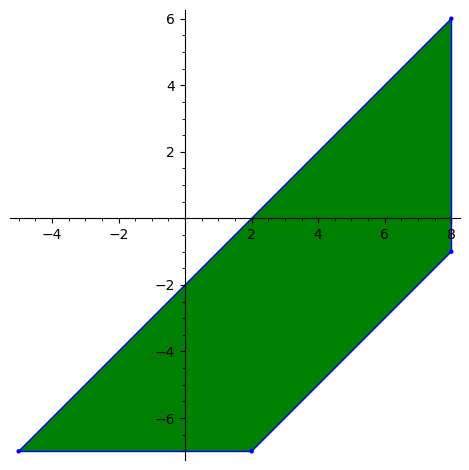

The roots of t times the Eulerian polynomial A_3(t) are: [(-sqrt(3) - 2, 1), (sqrt(3) - 2, 1), (0, 1)]

Now we compute the roots of h_{nP, w}^{*} as n goes to infinity.

740*z^3 + 4034*z^2 + 1344*z
[(-1/740*sqrt(3073729) - 2017/740, 1), (1/740*sqrt(3073729) - 2017/740, 1), (0, 1)]

6994*z^3 + 32540*z^2 + 9410*z
[(-2/3497*sqrt(12431210) - 8135/3497, 1), (2/3497*sqrt(12431210) - 8135/3497, 1), (0, 1)]

24880*z^3 + 109990*z^2 + 30316*z
[(-3/24880*sqrt(252243105) - 10999/4976, 1), (3/24880*sqrt(252243105) - 10999/4976, 1), (0, 1)]

60516*z^3 + 260856*z^2 + 70180*z
[(-4/5043*sqrt(5540126) - 3623/1681, 1), (4/5043*sqrt(5540126) - 3623/1681, 1), (0, 1)]

120020*z^3 + 509610*z^2 + 135120*z
[(-5/24004*sqrt(77933577) - 50961/24004, 1), (5/24004*sqrt(77933577) - 50961/24004, 1), (0, 1)]

209510*z^3 + 880724*z^2 + 231254*z
[(-6/104755*sqrt(1010199066) - 220181/104755, 1), (6/104755*sqrt(1010199066) - 220181/104755, 1), (0, 1)]

335104*z^3 + 1398670*z^2 + 364700*z
[(-35/47872*sqrt(6111737) - 99905/

In [21]:
# This code shows an example of a dimension 2, degree 1 combination of P, w, showing the roots of h_{nP, w}^{*} eventually converge towards the roots of the 
# Eulerian polynomial as n goes to infinity.

print("""This code blocks runs for a random 2D alcoved polytope and random weight and computes the roots of h_{nP, w}^{*}.""")
# Here's a 2D random polytrope. Copies code from random_polytrope, but allows us to keep the array.
test_array = [[randint(-20, 20) for i in range(3)] for j in range(3)] # [randint(-20,20) for i in range((dim_polytope+1) * (dim_polytope))], [1, 1, 1, 1, 1, 1]
test_polytrope = polytrope(test_array)
while dim(test_polytrope) < 2:
    test_polytrope = polytrope([[randint(-20, 20) for i in range(3)] for j in range(3)])
test_array = polytrope_to_B(test_polytrope) #Squishes back degenerate b_i_j into satisfying triangle inequalities
test_polytrope.show()

# Here's a random weight.
a = randint(-100, 100)
b = randint(-100, 100)
w = R_vars(a * x_1 + b * x_2)

# Here's its weighted hstar polynomial.
weighted_hstar_pol = weighted_hstar_from_weighted_count_alcoved(w, test_polytrope)

# Define polynomial rings R[t]
# R_t = PolynomialRing(RR, 't').gen()

# Compute the rotos of t times Eulerian polynomial
print(f"The roots of t times the Eulerian polynomial A_{3}(t) are: " + str((t * eulerian_polynomial(3)).roots()))
print()
print("Now we compute the roots of h_{nP, w}^{*} as n goes to infinity.")
print()
# For each of the dilates h_{nP, w}^{*}, compute the roots
for i in range(1, 101):
    weighted_hstar_pol_ith_dilate = weighted_hstar_pol(b_1_2 = i * test_array[0][1], b_1_3 = i * test_array[0][2], 
                                                       b_2_1 = i * test_array[1][0], b_2_3 = i * test_array[1][2], 
                                                       b_3_1 = i * test_array[2][0], b_3_2 = i * test_array[2][1])
    print(weighted_hstar_pol_ith_dilate)
    # Compute the roots of the above!
    print(weighted_hstar_pol_ith_dilate.roots())
    print()

Case 154
i is 3


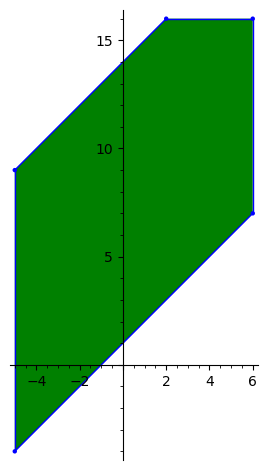

[[0, -1, 6], [14, 0, 16], [5, 4, 0]]
-83*x_1 + 3*x_2
The weighted h* polynomial is
862*z^3 + 19255*z^2 + 9070*z

Case 496
i is 17


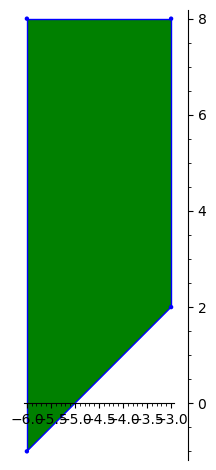

[[0, -5, -3], [14, 0, 8], [6, 1, 0]]
-83*x_1 - 91*x_2
The weighted h* polynomial is
-86700*z^3 - 178602*z^2



In [22]:
# This code computes 1000 examples of dimension 2, weight 1 combinations of P and w, and dilates 
# h_{nP, w}^{*} until h_{nP, w}^{*} all have the same signs. We only print out the cases for which
# h_{P, w}^{*} does not start out with the same signs, but h_{nP, w}^{*} eventually has the same signs for n >= 2. 
# NOTE: In the case of dimension 2, weight 1, it may be that you do not get output.

import random

for g in range(1, 1001):
    # Here's a 2D random polytrope. Copies code from random_polytrope, but allows us to keep the array.
    test_array = [[randint(-20, 20) for i in range(3)] for j in range(3)] # [randint(-20,20) for i in range((dim_polytope+1) * (dim_polytope))], [1, 1, 1, 1, 1, 1]
    test_polytrope = polytrope(test_array)
    while dim(test_polytrope) < 2:
        test_polytrope = polytrope([[randint(-20, 20) for i in range(3)] for j in range(3)])
    test_array = polytrope_to_B(test_polytrope) #Squishes back degenerate b_i_j into satisfying triangle inequalities
    #test_polytrope.show()
    #print()

    # Here's a random weight.
    a = random.randint(-100, 100)
    b = random.randint(-100, 100)
    w = R_vars(a * x_1 + b * x_2)
    #print("Weight is", str(w))
    
    # Here it's weighted hstar polynomial.
    weighted_hstar_pol = weighted_hstar_from_weighted_count_alcoved(w, test_polytrope)
    #print(weighted_hstar_pol)

    # Now iterate through dilates by evaluating at different multiples of b until we get a dilate with all positive or all negative
    
    
    for i in range(1, 10001):
        weighted_hstar_pol_ith_dilate = weighted_hstar_pol(b_1_2 = i * test_array[0][1], b_1_3 = i * test_array[0][2], 
                                                           b_2_1 = i * test_array[1][0], b_2_3 = i * test_array[1][2], 
                                                           b_3_1 = i * test_array[2][0], b_3_2 = i * test_array[2][1])
        deg_h = weighted_hstar_pol_ith_dilate.degree(z)
        all_same_sign = True
        for j in range(0, deg_h):
            if sign(weighted_hstar_pol_ith_dilate.coefficient(z^deg_h)) == -sign(weighted_hstar_pol_ith_dilate.coefficient(z^j)):
                all_same_sign = False
        if all_same_sign:
            if i != 1:
                print("Case", g)
                print("i is", i) 
                test_polytrope.show()
                print(test_array)
                print(w)
                # Here's its h* polynomial
                print("The weighted h* polynomial is")
                print(weighted_hstar_pol_ith_dilate)
                print()
            break

This code blocks runs for a fixed 2D alcoved polytope and computes h_{nP, w}^{*}
until we get all the signs of the coefficients match, which occurs for n >= 63.


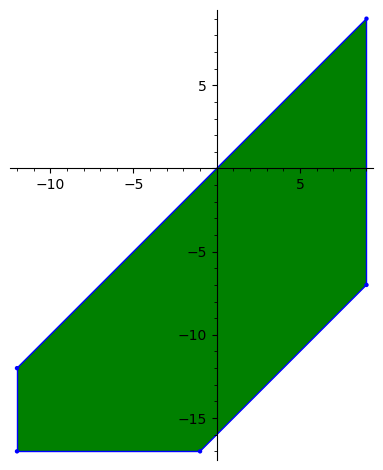

[[0, 16, 9], [0, 0, 9], [12, 17, 0]]

-10*z^3 + 11*z
[-1.05, 1.05, 0.0]

-40*z^3 + 4*z^2 + 44*z
[1.1, -1.0, 0.0]

-89*z^3 + 16*z^2 + 100*z
[-0.97, 1.15, 0.0]

-156*z^3 + 40*z^2 + 180*z
[-0.95, 1.21, 0.0]

-240*z^3 + 80*z^2 + 285*z
[-0.94, 1.27, 0.0]

-340*z^3 + 140*z^2 + 416*z
[-0.92, 1.33, 0.0]

-455*z^3 + 224*z^2 + 574*z
[-0.9, 1.4, 0.0]

-584*z^3 + 336*z^2 + 760*z
[-0.89, 1.46, 0.0]

-726*z^3 + 480*z^2 + 975*z
[-0.87, 1.54, 0.0]

-880*z^3 + 660*z^2 + 1220*z
[-0.86, 1.61, 0.0]

-1045*z^3 + 880*z^2 + 1496*z
[-0.85, 1.69, 0.0]

-1220*z^3 + 1144*z^2 + 1804*z
[-0.83, 1.77, 0.0]

-1404*z^3 + 1456*z^2 + 2145*z
[-0.82, 1.86, 0.0]

-1596*z^3 + 1820*z^2 + 2520*z
[-0.81, 1.95, 0.0]

-1795*z^3 + 2240*z^2 + 2930*z
[-0.8, 2.05, 0.0]

-2000*z^3 + 2720*z^2 + 3376*z
[-0.79, 2.15, 0.0]

-2210*z^3 + 3264*z^2 + 3859*z
[-0.78, 2.25, 0.0]

-2424*z^3 + 3876*z^2 + 4380*z
[-0.76, 2.36, 0.0]

-2641*z^3 + 4560*z^2 + 4940*z
[-0.75, 2.48, 0.0]

-2860*z^3 + 5320*z^2 + 5540*z
[-0.74, 2.6, 0.0]

-3080*z^3 + 6160*z

In [26]:
# Fixed example, dimension 2, degree 1

print("""This code blocks runs for a fixed 2D alcoved polytope and computes h_{nP, w}^{*}
until we get all the signs of the coefficients match, which occurs for n >= 63.""")
# Here's a 2D random polytrope. Copies code from random_polytrope, but allows us to keep the array.
test_array = [[0, 16, 9], [0, 0, 9], [12, 17, 0]] # [randint(-20,20) for i in range((dim_polytope+1) * (dim_polytope))] # [randint(-20,20) for i in range((dim_polytope+1) * (dim_polytope))], [1, 1, 1, 1, 1, 1]
test_polytrope = polytrope(test_array)
test_array = polytrope_to_B(test_polytrope) #Squishes back degenerate b_i_j into satisfying triangle inequalities
test_polytrope.show()
print(test_array)

w = R_vars(x_1)
# Here it's weighted hstar polynomial.
weighted_ehr_pol = weighted_ehrhart_polynomial_alcoved(w, test_polytrope)(b_1_2 =  test_array[0][1], b_1_3 = test_array[0][2], 
                                                       b_2_1 = test_array[1][0], b_2_3 =  test_array[1][2], 
                                                       b_3_1 =  test_array[2][0], b_3_2 =  test_array[2][1]) 
print() 

weighted_hstar_pol = weighted_hstar_from_weighted_count_alcoved(w, test_polytrope)

for i in range(1, 6000):
    weighted_hstar_pol_ith_dilate = weighted_hstar_pol(b_1_2 = i * test_array[0][1], b_1_3 = i * test_array[0][2], 
                                                       b_2_1 = i * test_array[1][0], b_2_3 = i * test_array[1][2], 
                                                       b_3_1 = i * test_array[2][0], b_3_2 = i * test_array[2][1])
    # Around dilate 63, we get all same sign.
    if i == 62:
        print("MARKER")
        print()
    print(weighted_hstar_pol_ith_dilate)
    print([round(r[0], 2) for r in weighted_hstar_pol_ith_dilate.roots()])
    print()